In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job/data_science_job.csv
/kaggle/input/carsdata/cars.csv
/kaggle/input/house-train/house-train.csv
/kaggle/input/titanic-mixedvar/titanic.csv
/kaggle/input/customer/customer.csv
/kaggle/input/winedata/wine_data.csv
/kaggle/input/date-time-examples/messages.csv
/kaggle/input/date-time-examples/orders.csv
/kaggle/input/fifty-startups/50_Startups.csv
/kaggle/input/concrete-data/concrete_data.csv
/kaggle/input/placement/placement.csv
/kaggle/input/titanic-info/train (1).csv
/kaggle/input/titanic-toy/titanic_toy.csv
/kaggle/input/social-networks/Social_Network_Ads.csv
/kaggle/input/covidtoy/covid_toy.csv
/kaggle/input/train-dataset/train.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
import os
os.listdir("/kaggle/input/social-networks")

['Social_Network_Ads.csv']

In [4]:
df = pd.read_csv('/kaggle/input/social-networks/Social_Network_Ads.csv')

In [5]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [9]:
df = df.iloc[:,2:]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [10]:
df.shape

(400, 3)

**Standardization**

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train  ,Y_test = train_test_split(df.drop('Purchased',axis=1), df['Purchased'] , test_size=0.3 , random_state=0)
X_train.shape , X_test.shape

((280, 2), (120, 2))

In [12]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
X_train.head()

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000

In [14]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [15]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    X_test_scaled ,
    columns = X_test.columns
)

In [16]:
np.round(X_train.describe(),1)# round all the nums  to ones decimal place 

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [17]:
np.round(X_train_scaled.describe(),1)# round all the nums  to ones decimal place 

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

Text(0.5, 1.0, 'After Scaling')

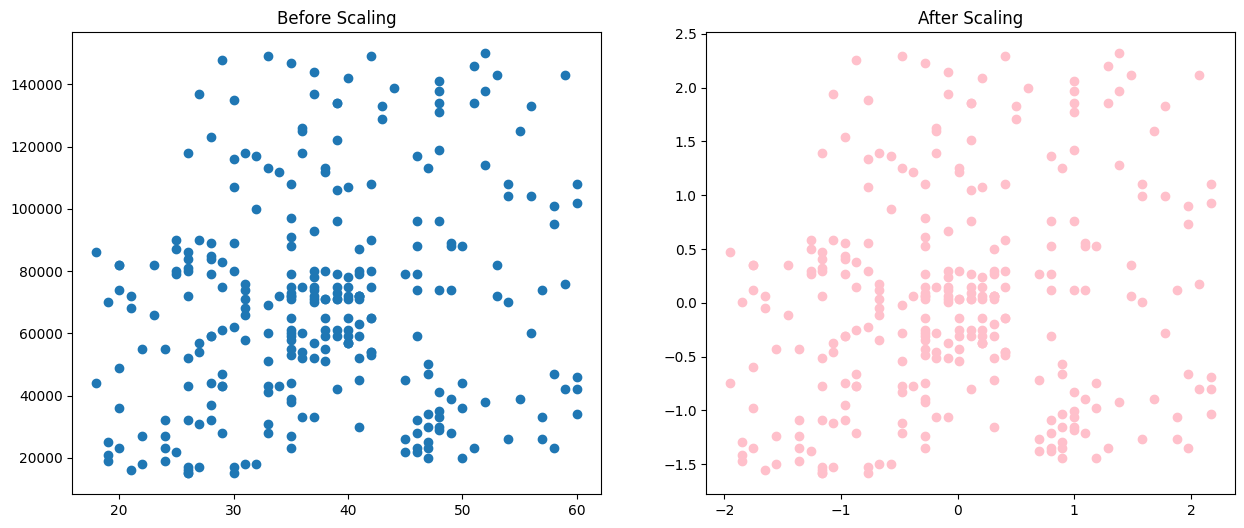

In [18]:
fig , (ax1,ax2) = plt.subplots(ncols = 2 ,figsize = (15,6))
ax1.scatter(x='Age' , y='EstimatedSalary', data=X_train )
ax1.set_title("Before Scaling")
ax2.scatter(x='Age', y='EstimatedSalary',data=X_train_scaled,color='pink')
ax2.set_title("After Scaling")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

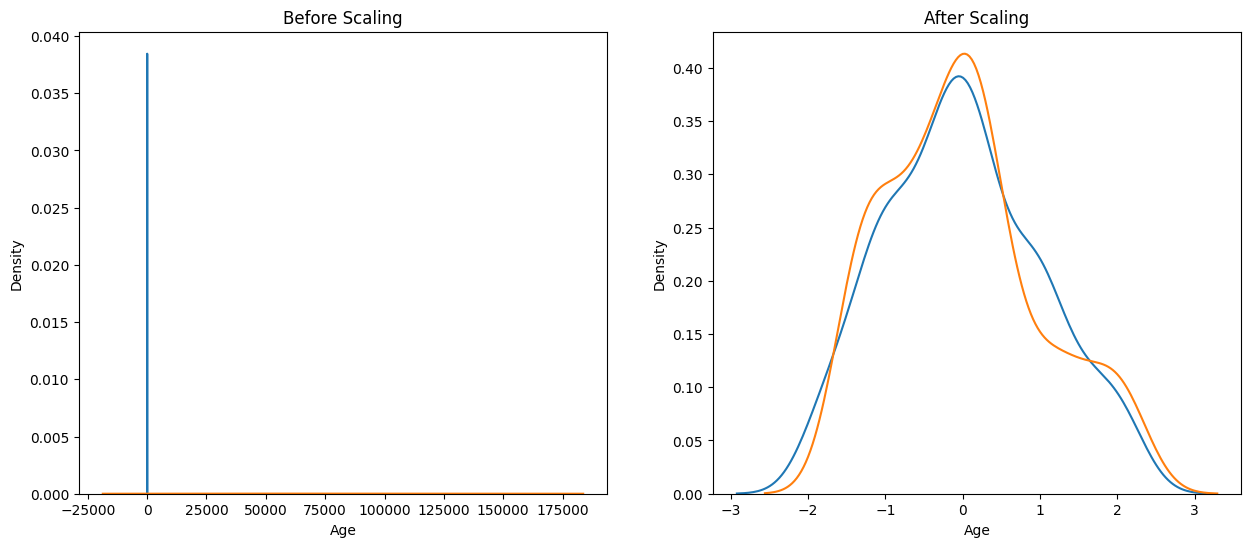

In [19]:
fig , (ax1,ax2) = plt.subplots(ncols =2 , figsize = (15,6))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


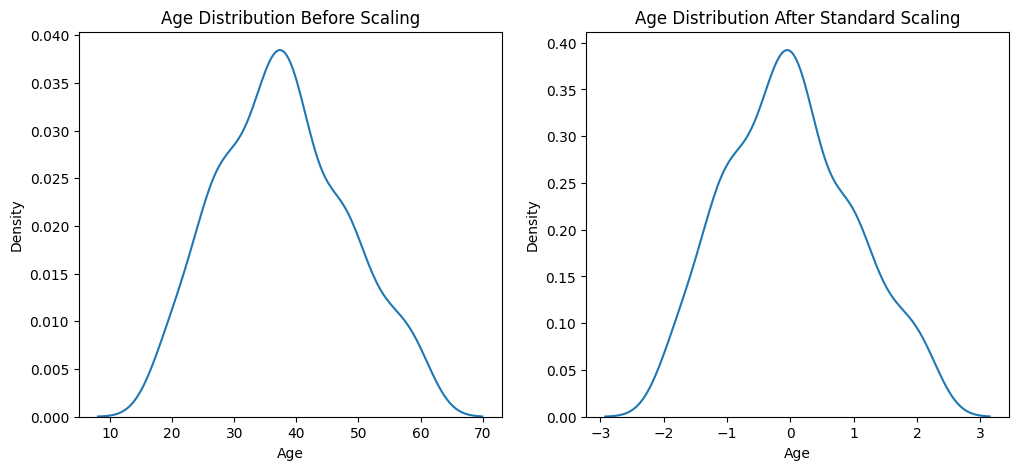

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


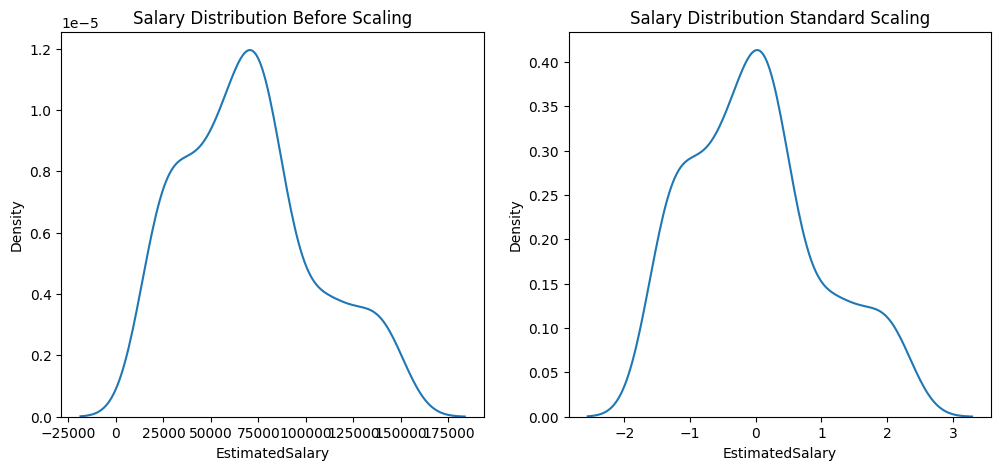

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

**Normalization**

In [22]:
wine = pd.read_csv("/kaggle/input/winedata/wine_data.csv",header=None ,usecols=[0,1,2])
wine.columns=['Class Label','Alchohol','Malic Acid']
wine.head()

Class Label  Alchohol  Malic Acid
0            1     14.23        1.71
1            1     13.20        1.78
2            1     13.16        2.36
3            1     14.37        1.95
4            1     13.24        2.59

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(wine.drop('Class Label' ,axis=1),
                                                      wine['Class Label'],
                                                      test_size =0.3 , 
                                                      random_state = 0)
wine.shape ,X_train.shape , X_test.shape ,Y_train.shape

((178, 3), (124, 2), (54, 2), (124,))

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)
np.round(X_train.describe(),1) , np.round(X_train_scaled.describe(),1)

(       Alchohol  Malic Acid
 count     124.0       124.0
 mean       13.0         2.4
 std         0.8         1.1
 min        11.0         0.9
 25%        12.4         1.6
 50%        13.0         1.9
 75%        13.6         3.2
 max        14.8         5.6,
        Alchohol  Malic Acid
 count     124.0       124.0
 mean        0.5         0.3
 std         0.2         0.2
 min         0.0         0.0
 25%         0.4         0.2
 50%         0.5         0.2
 75%         0.7         0.5
 max         1.0         1.0)

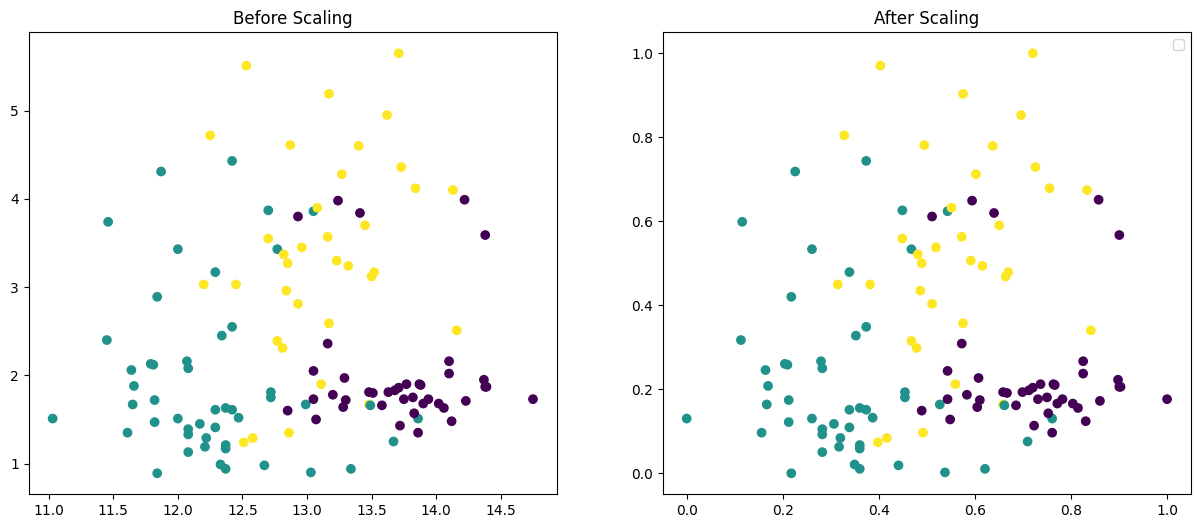

In [26]:
fig , (ax1,ax2) = plt.subplots(ncols = 2, figsize=(15,6))

ax1.scatter(X_train['Alchohol'], X_train['Malic Acid'],c=Y_train)
ax1.set_title("Before Scaling")
plt.legend()

ax2.scatter(X_train_scaled['Alchohol'], X_train_scaled['Malic Acid'],c=Y_train)
ax2.set_title("After Scaling")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: title={'center': 'After Scaling'}, xlabel='Alchohol', ylabel='Density'>

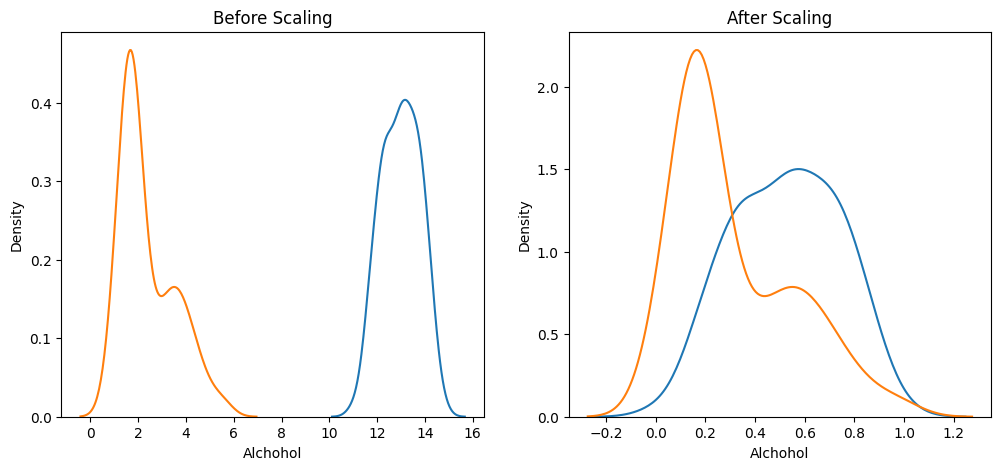

In [27]:
fig , (ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alchohol'],ax = ax1)
sns.kdeplot(X_train['Malic Acid'],ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alchohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Alcohol After Scaling'}, xlabel='Alchohol', ylabel='Density'>

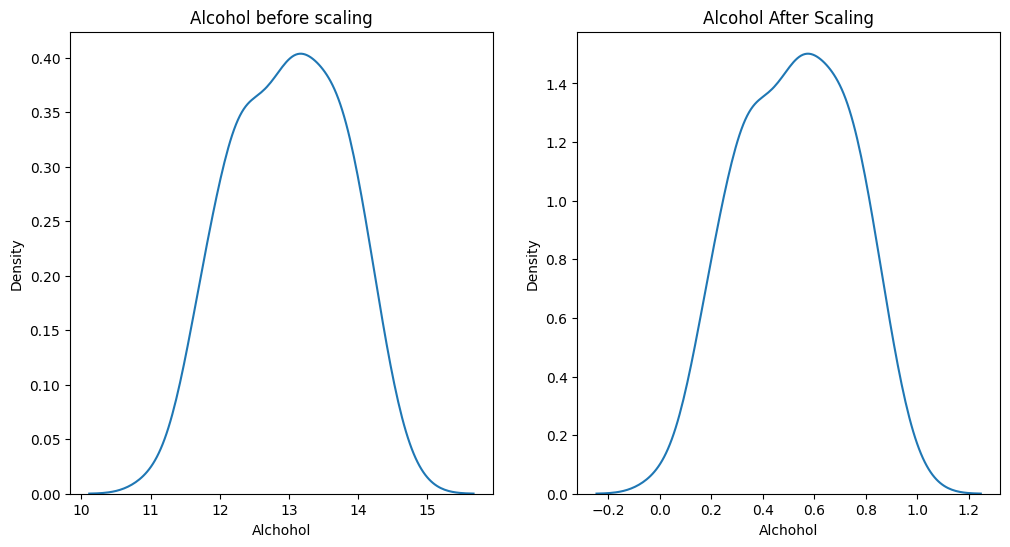

In [28]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,6))

ax1.set_title("Alcohol before scaling")
sns.kdeplot(X_train['Alchohol'],ax=ax1)

ax2.set_title("Alcohol After Scaling")
sns.kdeplot(X_train_scaled['Alchohol'],ax=ax2)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Malic Acid After Scaling'}, xlabel='Malic Acid', ylabel='Density'>

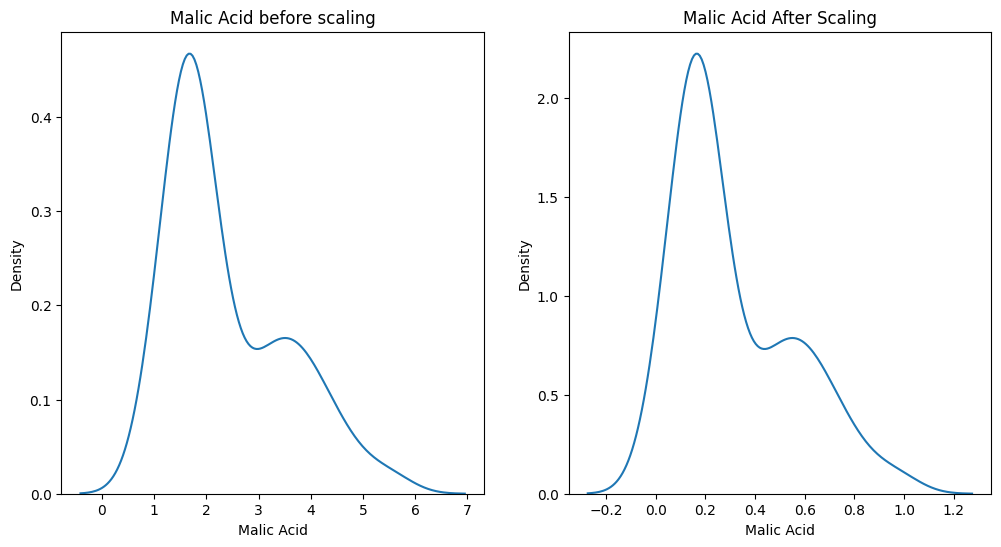

In [29]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,6))

ax1.set_title("Malic Acid before scaling")
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

ax2.set_title("Malic Acid After Scaling")
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

**Ordinal Encoding**

In [30]:
cus = pd.read_csv("/kaggle/input/customer/customer.csv")
cus.head()

age  gender   review education purchased
0   30  Female  Average    School        No
1   68  Female     Poor        UG        No
2   70  Female     Good        PG        No
3   72  Female     Good        PG        No
4   16  Female  Average        UG        No

In [31]:

df = cus.iloc[:,2:]


In [32]:
df.head()

review education purchased
0  Average    School        No
1     Poor        UG        No
2     Good        PG        No
3     Good        PG        No
4  Average        UG        No

In [33]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train,y_test = train_test_split(df.drop('purchased',axis = 1), df['purchased'], 
                                                   test_size=0.3 , random_state=0)
X_train.shape ,X_test.shape , df.shape

((35, 2), (15, 2), (50, 3))

In [34]:
from sklearn.preprocessing import OrdinalEncoder 
encoder = OrdinalEncoder(categories=[['Poor','Good','Average'],['School','UG','PG']])

In [35]:
encoder.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Good', 'Average'], ['School', 'UG', 'PG']])

In [36]:
X_train = encoder.transform(X_train)

In [37]:
encoder.categories_

[array(['Poor', 'Good', 'Average'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

**Label Encoding**

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)

LabelEncoder()

In [39]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [40]:

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [41]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

**One hot encoding**

In [42]:
cars = pd.read_csv("/kaggle/input/carsdata/cars.csv")
cars.head()

brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000

In [43]:
#one hot using pandas
pd.get_dummies(cars,columns=['fuel','owner'])

brand  km_driven  selling_price  fuel_CNG  fuel_Diesel  fuel_LPG  \
0      Maruti     145500         450000     False         True     False   
1       Skoda     120000         370000     False         True     False   
2       Honda     140000         158000     False        False     False   
3     Hyundai     127000         225000     False         True     False   
4      Maruti     120000         130000     False        False     False   
...       ...        ...            ...       ...          ...       ...   
8123  Hyundai     110000         320000     False        False     False   
8124  Hyundai     119000         135000     False         True     False   
8125   Maruti     120000         382000     False         True     False   
8126     Tata      25000         290000     False         True     False   
8127     Tata      25000         290000     False         True     False   

      fuel_Petrol  owner_First Owner  owner_Fourth & Above Owner  \
0           False               True                       False   
1           False              False                       False   
2            True              False                       False   
3           False               True                       False   
4            True               True                       False   
...           ...                ...                         ...   
8123         True               True                       False   
8124        False              False                        True   
8125        False               True                       False   
8126        False               True                       False   
8127        False               True                       False   

      owner_Second Owner  owner_Test Drive Car  owner_Third Owner  
0                  False                 False              False  
1                   True                 False              False  
2                  False                 False               True  
3                  False                 False              False  
4                  False                 False              False  
...                  ...                   ...                ...  
8123               False                 False              False  
8124               False                 False              False  
8125               False                 False              False  
8126               False                 False              False  
8127               False                 False              False  

[8128 rows x 12 columns]

In [44]:
#K-1 hot encoding
pd.get_dummies(cars ,columns=['fuel','owner'], drop_first = True)

brand  km_driven  selling_price  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0      Maruti     145500         450000         True     False        False   
1       Skoda     120000         370000         True     False        False   
2       Honda     140000         158000        False     False         True   
3     Hyundai     127000         225000         True     False        False   
4      Maruti     120000         130000        False     False         True   
...       ...        ...            ...          ...       ...          ...   
8123  Hyundai     110000         320000        False     False         True   
8124  Hyundai     119000         135000         True     False        False   
8125   Maruti     120000         382000         True     False        False   
8126     Tata      25000         290000         True     False        False   
8127     Tata      25000         290000         True     False        False   

      owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                          False               False                 False   
1                          False                True                 False   
2                          False               False                 False   
3                          False               False                 False   
4                          False               False                 False   
...                          ...                 ...                   ...   
8123                       False               False                 False   
8124                        True               False                 False   
8125                       False               False                 False   
8126                       False               False                 False   
8127                       False               False                 False   

      owner_Third Owner  
0                 False  
1                 False  
2                  True  
3                 False  
4                 False  
...                 ...  
8123              False  
8124              False  
8125              False  
8126              False  
8127              False  

[8128 rows x 10 columns]

In [45]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(cars.drop('selling_price',axis=1),cars['selling_price'],
                                                     test_size=0.3 , random_state=0)

In [46]:
X_train.head()

brand  km_driven    fuel        owner
5224       Tata      20000  Petrol  First Owner
520      Maruti      30000  Petrol  First Owner
36       Maruti      15000  Petrol  First Owner
5782       Ford      53000  Diesel  First Owner
6522  Chevrolet     120000  Diesel  First Owner

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [48]:
X_train_new = encoder.fit_transform(X_train[['fuel','owner']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
X_test_new = encoder.transform(X_test[['fuel','owner']])

In [50]:
#hstack-> horizontal stack  , .values-> converts df into np.array 
np.hstack((X_train[['brand','km_driven']].values, X_train_new))

array([['Tata', 20000, 0, ..., 0, 0, 0],
       ['Maruti', 30000, 0, ..., 0, 0, 0],
       ['Maruti', 15000, 0, ..., 0, 0, 0],
       ...,
       ['Hyundai', 90000, 0, ..., 1, 0, 0],
       ['Volkswagen', 90000, 1, ..., 0, 0, 0],
       ['Hyundai', 110000, 0, ..., 0, 0, 0]], dtype=object)

one hot encoding the top categories


In [51]:
counts = cars['brand'].value_counts()
counts

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [52]:
cars.head()

brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000

In [53]:
cars['brand'].nunique() # just tells how many unique brands exists
threshold = 100

In [54]:
replace = counts[counts<= threshold].index

In [55]:
pd.get_dummies(cars['brand'].replace(replace,'Uncommon'),dtype=int).sample(7)

BMW  Chevrolet  Ford  Honda  Hyundai  Mahindra  Maruti  Renault  Skoda  \
5207    0          0     0      0        0         0       0        0      0   
5084    0          0     0      0        0         0       0        0      0   
4795    0          0     0      0        0         0       1        0      0   
1846    0          0     0      0        1         0       0        0      0   
1443    0          0     0      0        0         0       1        0      0   
7448    0          1     0      0        0         0       0        0      0   
1044    0          0     0      0        0         0       0        0      0   

      Tata  Toyota  Uncommon  Volkswagen  
5207     1       0         0           0  
5084     0       0         1           0  
4795     0       0         0           0  
1846     0       0         0           0  
1443     0       0         0           0  
7448     0       0         0           0  
1044     0       1         0           0

**Column Transformer**

In [56]:
df = pd.read_csv("/kaggle/input/covidtoy/covid_toy.csv")
df.head()

age  gender  fever cough     city has_covid
0   60    Male  103.0  Mild  Kolkata        No
1   27    Male  100.0  Mild    Delhi       Yes
2   42    Male  101.0  Mild    Delhi        No
3   31  Female   98.0  Mild  Kolkata        No
4   65  Female  101.0  Mild   Mumbai        No

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder
from sklearn.impute import SimpleImputer

In [58]:
X_train , X_test ,y_train , y_test = train_test_split(
                                        df.drop('has_covid',axis = 1),
    df['has_covid'] , test_size=0.3 , random_state=0
)

In [59]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

Big Way

In [60]:
imputer = SimpleImputer()
X_train_fever = imputer.fit_transform(X_train[['fever']])
X_test_fever = imputer.fit_transform(X_test[['fever']])
X_train_fever.shape

(70, 1)

In [61]:
df.sample(3)

age  gender  fever   cough       city has_covid
12   25  Female   99.0  Strong    Kolkata        No
81   65    Male   99.0    Mild      Delhi        No
43   22  Female   99.0    Mild  Bangalore       Yes

In [62]:
encoder_oe = OrdinalEncoder(categories =[['Mild','Strong']])
X_train_cough = encoder_oe.fit_transform(X_train[['cough']])#double [[]] because sklearn takes 2d input , and so to avoid Series input , we do double[][]
X_test_cough = encoder_oe.fit_transform(X_test[['cough']])
X_train_cough.shape

(70, 1)

In [63]:
encoder_ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = encoder_ohe.fit_transform(X_train[['gender','city']])
X_test_gender_city = encoder_ohe.fit_transform(X_test[['gender','city']])
X_train_gender_city.shape

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(70, 4)

In [64]:
X_train.head(3)

age  gender  fever   cough       city
60   24  Female  102.0  Strong  Bangalore
80   14  Female   99.0    Mild     Mumbai
90   59  Female   99.0  Strong      Delhi

In [65]:
X_train_age= X_train[['age']]
X_test_age = X_test[['age']]
X_train_age.shape

(70, 1)

In [66]:
X_train_transformed = np.concatenate((X_train_age ,X_train_fever,X_train_gender_city , X_train_cough),axis=1)
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city ,X_test_cough),axis=1)

In [67]:
X_train_transformed.shape

(70, 7)

Easy and better way 

In [68]:
from sklearn.compose import ColumnTransformer

In [69]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False , drop='first'),['gender','city'])
],remainder='passthrough')

In [70]:
transformer.fit_transform(X_train).shape

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(70, 7)

In [71]:
transformer.fit_transform(X_test).shape

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(30, 7)

**Titanic without pipeline**

In [72]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [73]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [74]:
df=sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [75]:
df.drop(columns=['class','who','adult_male','deck','embark_town','alive','alone'],axis=1, inplace=True)

In [76]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [77]:
X_train ,X_test ,y_train, y_test = train_test_split(df.drop('survived',axis=1), df['survived'],
                                                   test_size=0.2 , random_state=42)

In [78]:
X_train.head(), y_train

(     pclass     sex   age  sibsp  parch     fare embarked
 331       1    male  45.5      0      0  28.5000        S
 733       2    male  23.0      0      0  13.0000        S
 382       3    male  32.0      0      0   7.9250        S
 704       3    male  26.0      1      0   7.8542        S
 813       3  female   6.0      4      2  31.2750        S,
 331    0
 733    0
 382    0
 704    0
 813    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: survived, Length: 712, dtype: int64)

In [79]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [80]:
si_age = SimpleImputer()
si_embarked = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(X_train[['age']])
X_train_embarked = si_embarked.fit_transform(X_train[['embarked']])

X_test_age = si_age.transform(X_test[['age']])
X_test_embarked = si_embarked.transform(X_test[['embarked']])

In [81]:
ohe_sex = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['sex']])
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
X_train_rem = X_train.drop(columns=['sex','age','embarked'])
X_test_rem = X_test.drop(columns=['sex','age','embarked'])


In [83]:

X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [84]:
X_test_transformed.shape


(179, 10)

In [85]:

clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [86]:

y_pred = clf.predict(X_test_transformed)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1])

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

In [88]:
import os
import pickle


# create folder if it doesn't exist
os.makedirs('models', exist_ok=True)

# now your pickle dumps will work
pickle.dump(ohe_sex, open('models/ohe_sex.pkl', 'wb'))
pickle.dump(ohe_embarked, open('models/ohe_embarked.pkl', 'wb'))
pickle.dump(clf, open('models/clf.pkl', 'wb'))


**Titanic with Pipeline**

In [89]:
X_train.head()

pclass     sex   age  sibsp  parch     fare embarked
331       1    male  45.5      0      0  28.5000        S
733       2    male  23.0      0      0  13.0000        S
382       3    male  32.0      0      0   7.9250        S
704       3    male  26.0      1      0   7.8542        S
813       3  female   6.0      4      2  31.2750        S

In [90]:
y_train.sample(5)

582    0
522    0
354    0
353    0
79     1
Name: survived, dtype: int64

In [91]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2

In [92]:

# imputation transformer
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])


# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)


# train the model
trf5 = DecisionTreeClassifier()

In [93]:

# Alternate Syntax
pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [94]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [95]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7cabd81dc5e0>)),
                ('trf5', DecisionTreeClassifier())])

In [96]:
pipe.named_steps


{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x7cabd81dc5e0>),
 'trf5': DecisionTreeClassifier()}

In [97]:
y_pred = pipe.predict(X_test)

In [98]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.6256983240223464

In [99]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

0.6391214419383433

In [100]:

# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [101]:
print(pipe)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),


In [102]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7cabd81dc5e0>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [103]:

grid.best_score_  , grid.best_params_

(0.6391214419383433, {'trf5__max_depth': 2})

In [104]:

# export 
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

**Function Transformer**

In [105]:
df = sns.load_dataset("titanic")
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [106]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [107]:
df = df[['age','fare','survived']]

df.head()

age     fare  survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [108]:
df.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [109]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.head(5)

/tmp/ipykernel_420/344826941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


age     fare  survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [110]:
df.isnull().sum()

age         0
fare        0
survived    0
dtype: int64

In [111]:
X_train , X_test ,y_train ,y_test = train_test_split(df.drop('survived', axis=1), df['survived'],test_size=0.2 , random_state=0)

/tmp/ipykernel_420/2221707200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


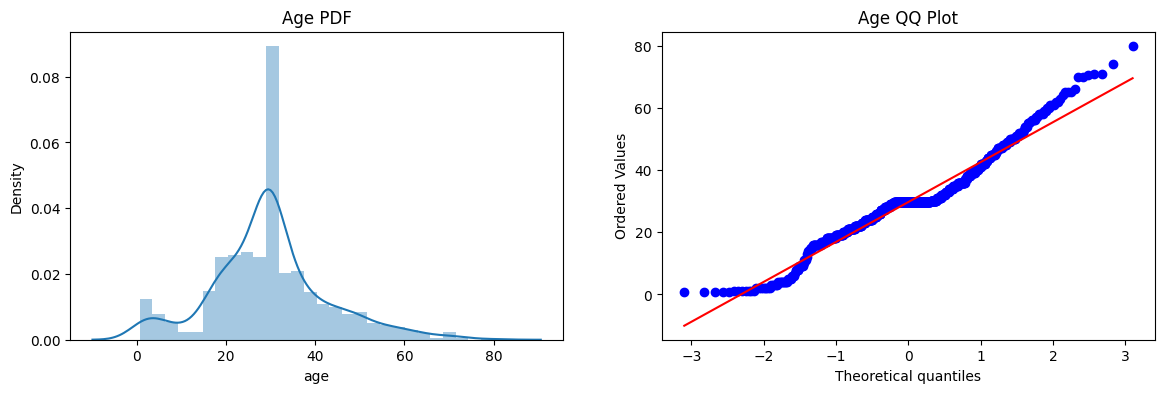

In [112]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipykernel_420/1553558339.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


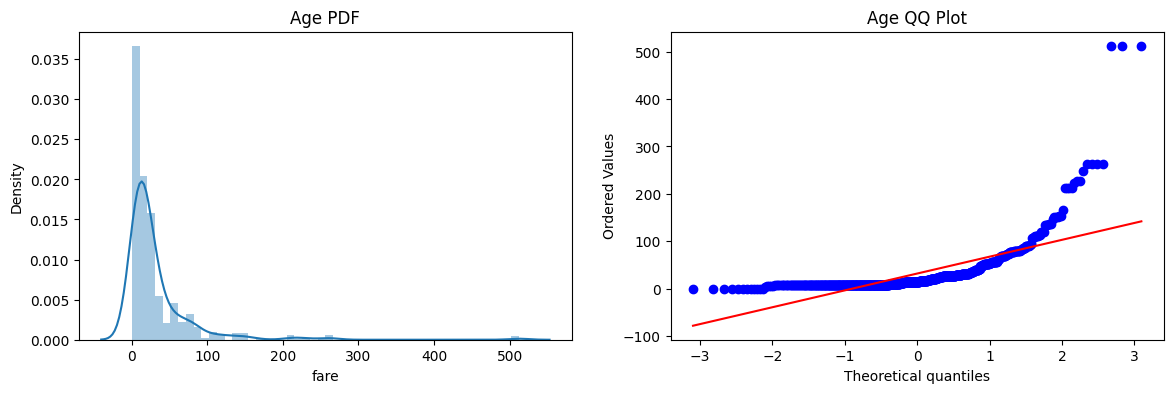

In [113]:

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [114]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6983240223463687
Accuracy DT 0.6703910614525139


In [115]:

trf = FunctionTransformer(func=np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [116]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7039106145251397
Accuracy DT 0.6759776536312849


In [117]:
X_transformed = trf.fit_transform(df.drop('survived',axis=1))
y = df['survived']
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6689263420724094


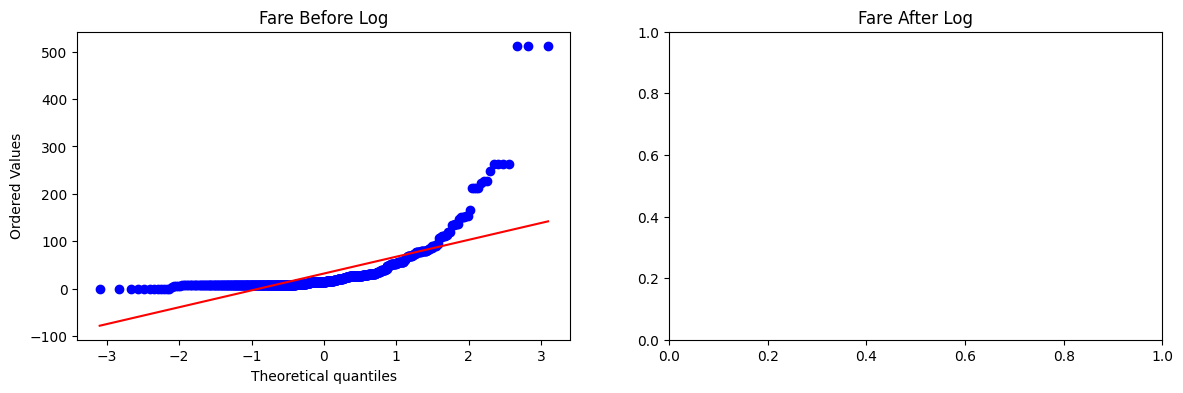

In [118]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
plt.title('Fare After Log')

plt.show()

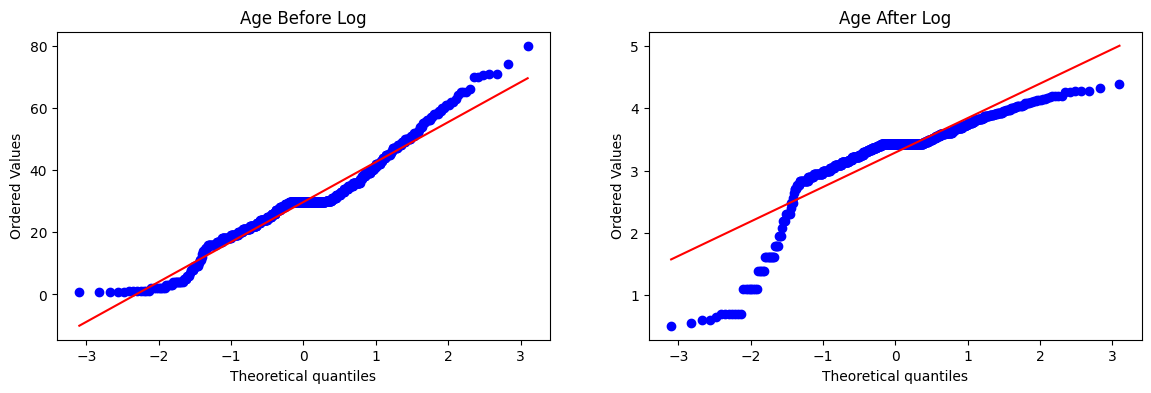

In [119]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [120]:

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [121]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.664804469273743


In [122]:
X_transformed2 = trf2.fit_transform(df.drop('survived',axis=1))
y = df['survived']
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6610736579275904


Via function defining

In [123]:
df.head()

age     fare  survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [124]:
def apply_transform(transform):
    X= df.iloc[:,0:2]
    y= df.iloc[: ,2]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6184144818976279


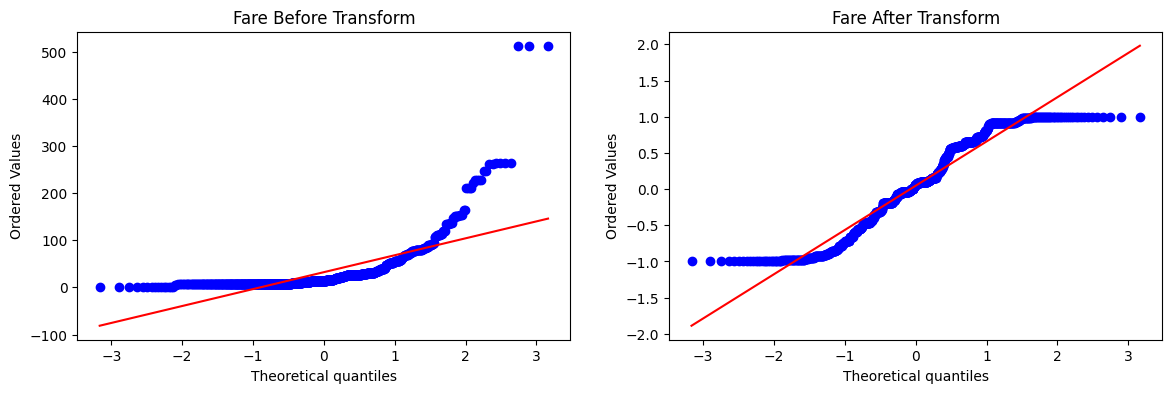

In [125]:
apply_transform(np.cos)

**Power transformer** 

In [126]:
df = pd.read_csv('/kaggle/input/concrete-data/concrete_data.csv')
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [127]:
df.shape , df.isnull().sum()

((1030, 9),
 Cement                0
 Blast Furnace Slag    0
 Fly Ash               0
 Water                 0
 Superplasticizer      0
 Coarse Aggregate      0
 Fine Aggregate        0
 Age                   0
 Strength              0
 dtype: int64)

In [128]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [129]:
X= df.drop(columns=['Strength'])
y = df['Strength']

In [130]:
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [131]:
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression

In [132]:
#Applying regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314851

In [133]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628617

In [134]:
import warnings
warnings.filterwarnings('ignore')

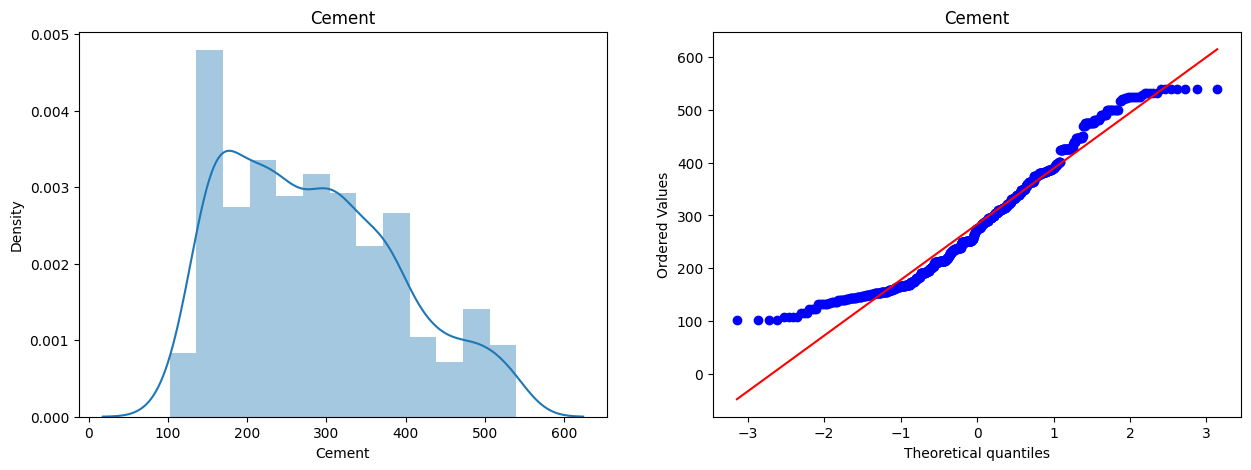

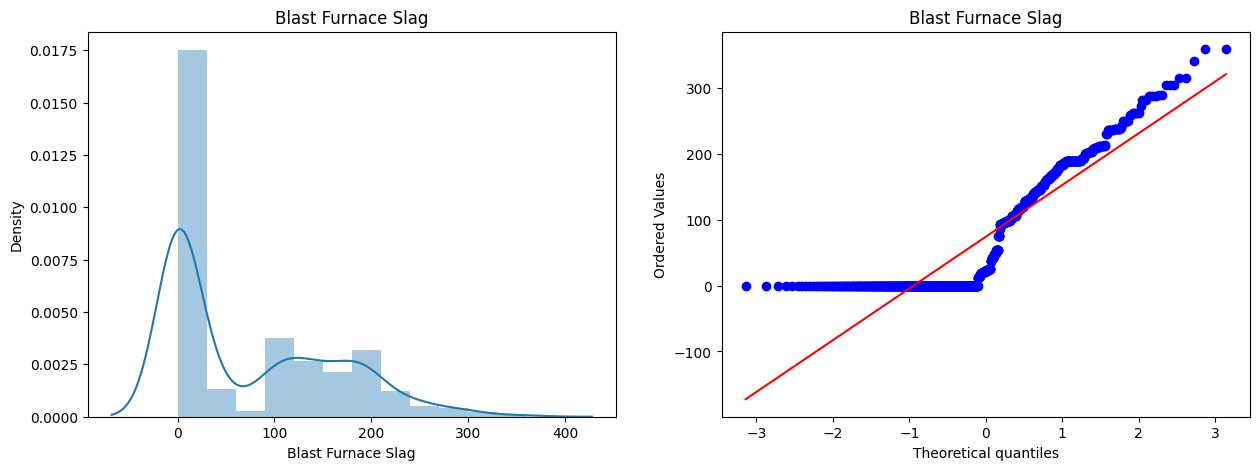

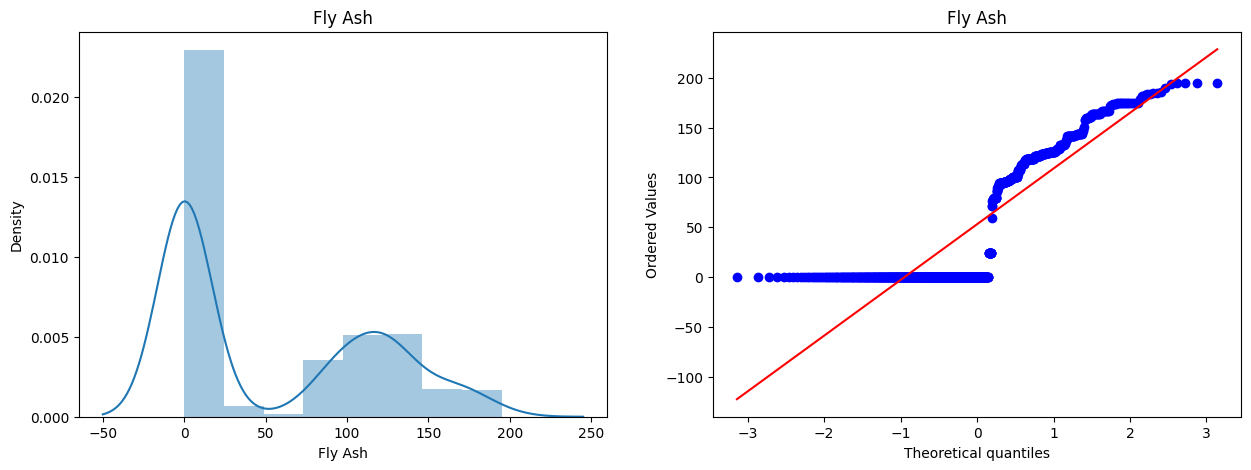

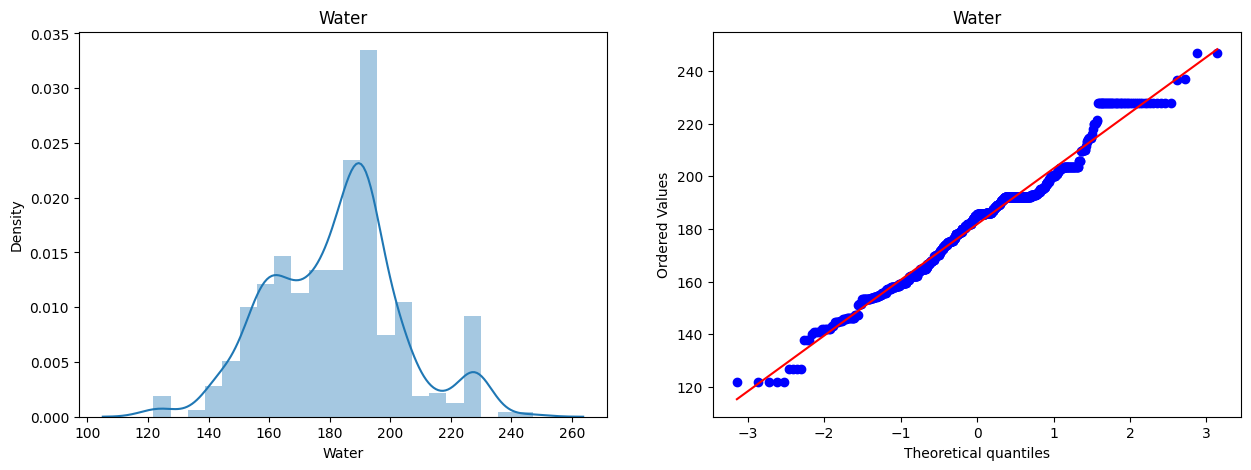

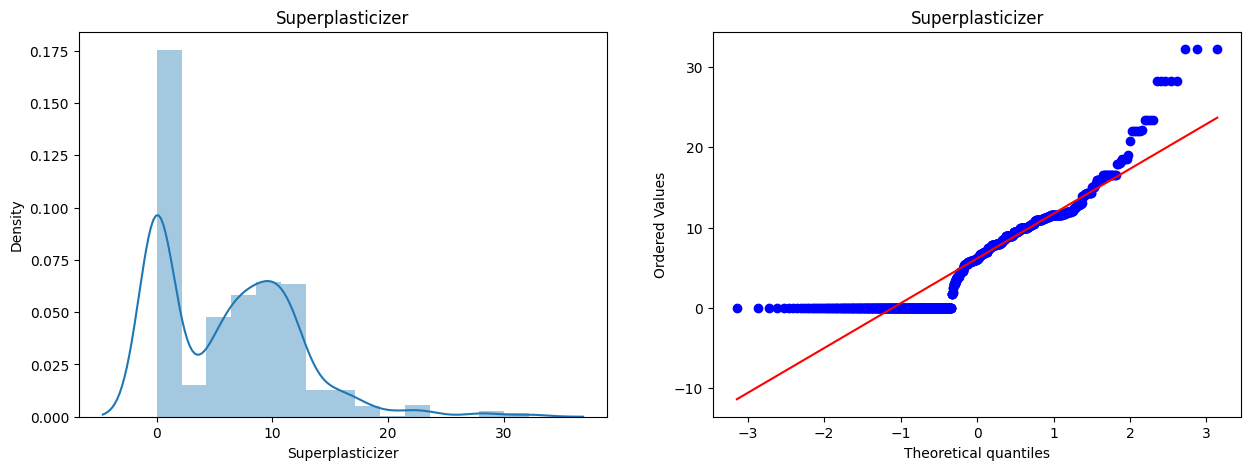

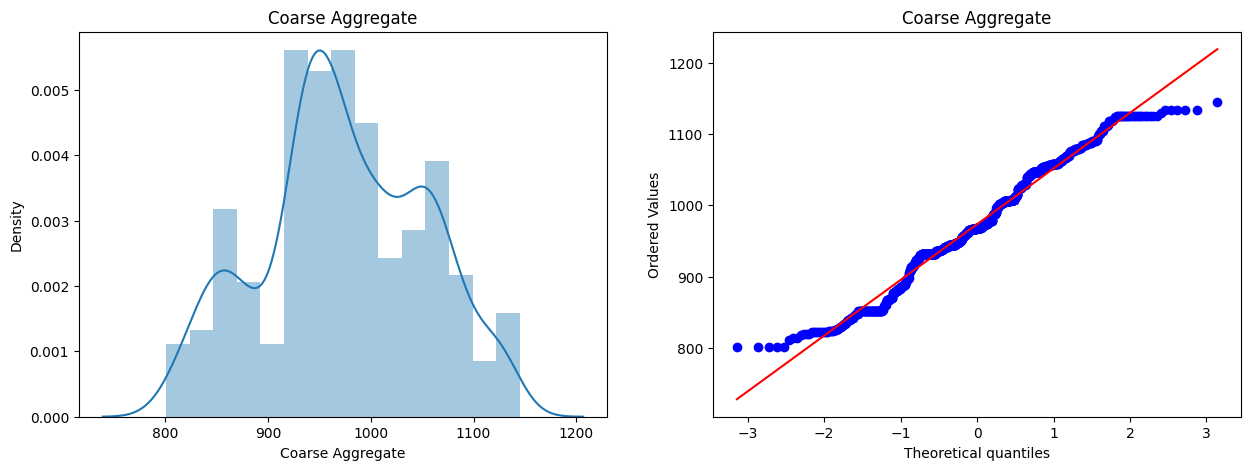

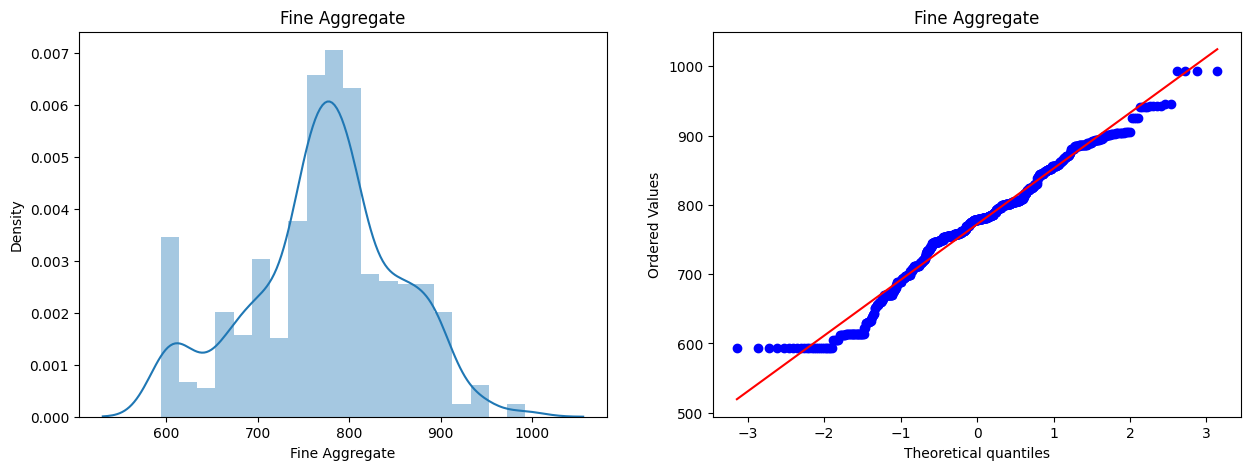

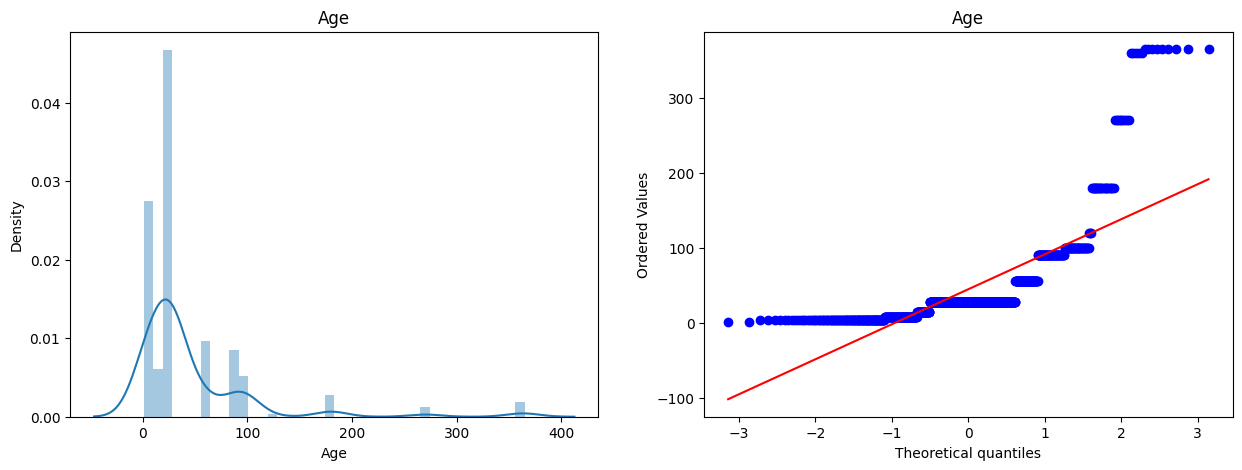

In [135]:
for col in X_train.columns: 
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm',plot=plt)
    plt.title(col)

    plt.show()

In [136]:
#Applyting Box-Cox Transformation
pf = PowerTransformer(method ='box-cox')

X_train_transformed = pf.fit_transform(X_train+0.000001)
X_test_transformed = pf.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns ,'box_cox_lambas': pf.lambdas_})

cols  box_cox_lambas
0              Cement        0.177025
1  Blast Furnace Slag        0.025093
2             Fly Ash       -0.038970
3               Water        0.772682
4    Superplasticizer        0.098811
5    Coarse Aggregate        1.129813
6      Fine Aggregate        1.782018
7                 Age        0.066631

In [137]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2= lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825005588295

In [138]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537939658903

In [139]:
X_train_transformed

array([[-1.27975148,  0.9561511 ,  1.12804495, ..., -0.26250008,
        -0.67756847,  0.10600969],
       [ 1.24470596,  0.70199413,  1.13757676, ..., -1.91272791,
        -0.31406219,  0.10600969],
       [ 0.07984236, -1.08566729,  1.13140696, ...,  1.01840672,
         0.02595744, -1.67597001],
       ...,
       [-0.84451727, -1.08566729,  1.13368097, ...,  1.34536665,
         0.29715694,  1.24673336],
       [ 1.5656235 ,  0.92549636, -0.88721185, ..., -1.5372548 ,
         0.0762111 ,  0.10600969],
       [ 0.42655631, -1.08566729,  1.12610617, ..., -0.62083414,
         0.0951082 ,  0.10600969]])

In [140]:
#Before and after comparision of box-plot
X_train_transformed = pd.DataFrame(X_train_transformed , columns=X_train.columns)
X_train_transformed.head()

Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0 -1.279751            0.956151  1.128045 -0.301920          0.898506   
1  1.244706            0.701994  1.137577 -0.165055          0.749235   
2  0.079842           -1.085667  1.131407 -1.047291          0.788486   
3 -0.145641            0.898125  1.096514  0.581224          0.733792   
4 -1.131044            0.787203  1.133149 -1.105297          0.811152   

   Coarse Aggregate  Fine Aggregate      Age  
0         -0.262500       -0.677568  0.10601  
1         -1.912728       -0.314062  0.10601  
2          1.018407        0.025957 -1.67597  
3         -1.750779        0.583253  0.10601  
4          1.368575        0.262623 -1.67597

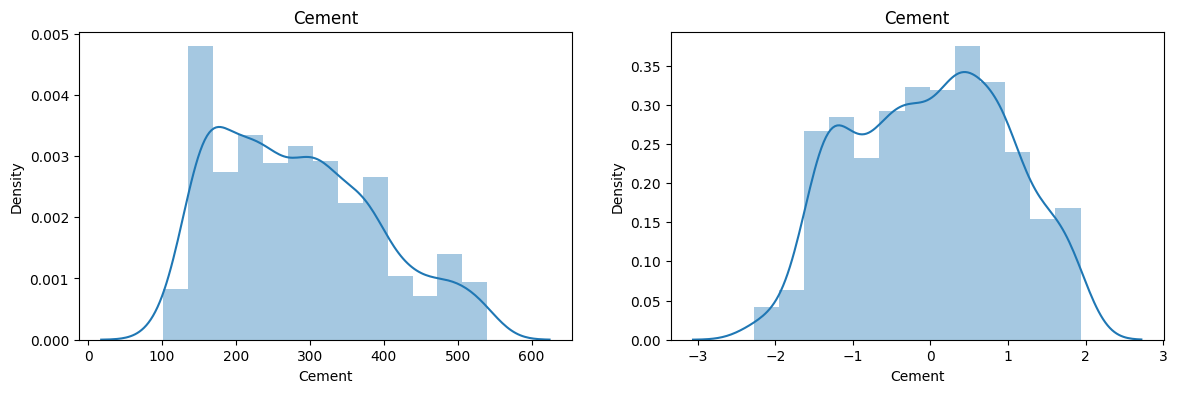

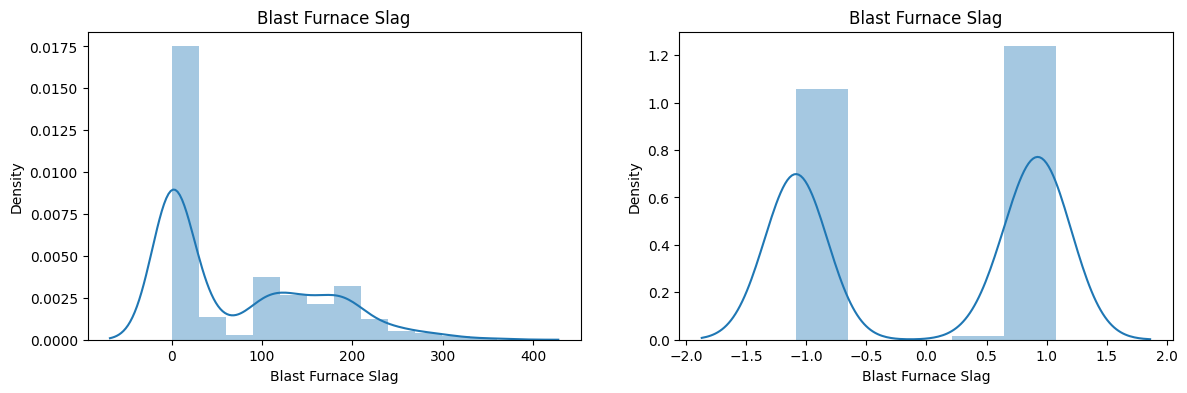

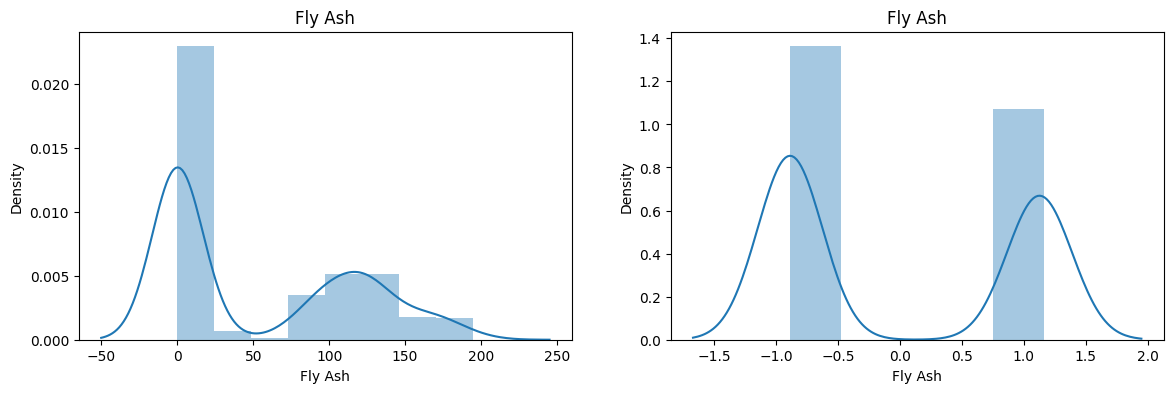

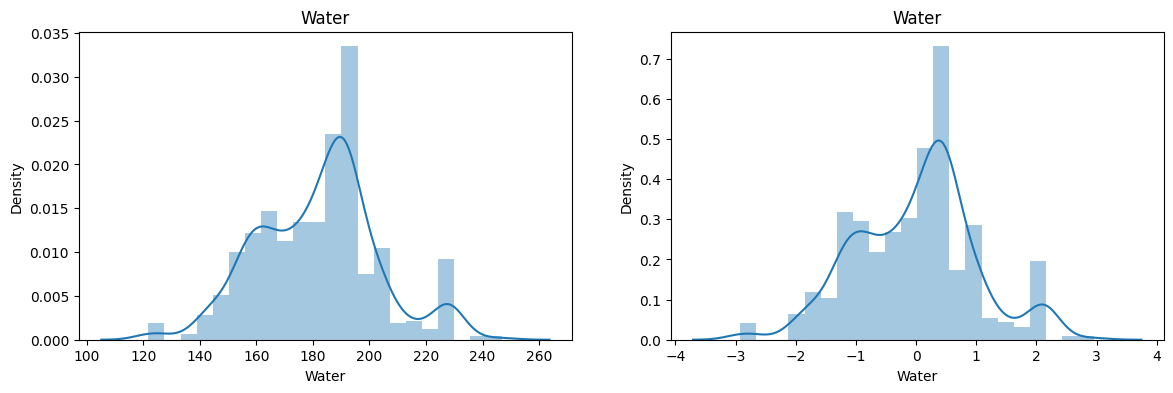

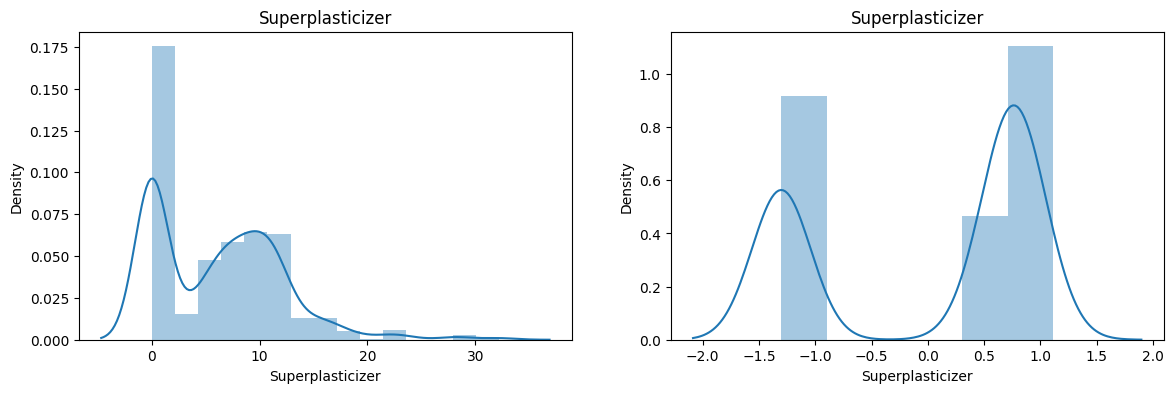

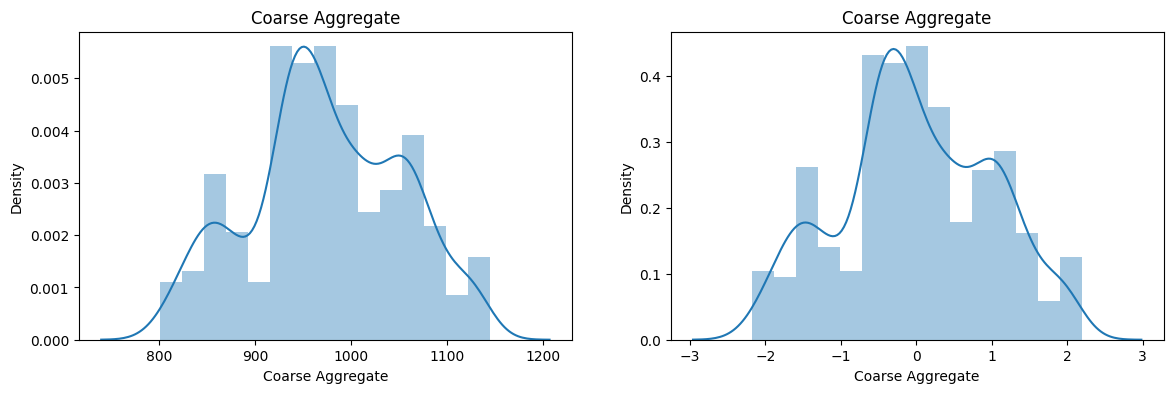

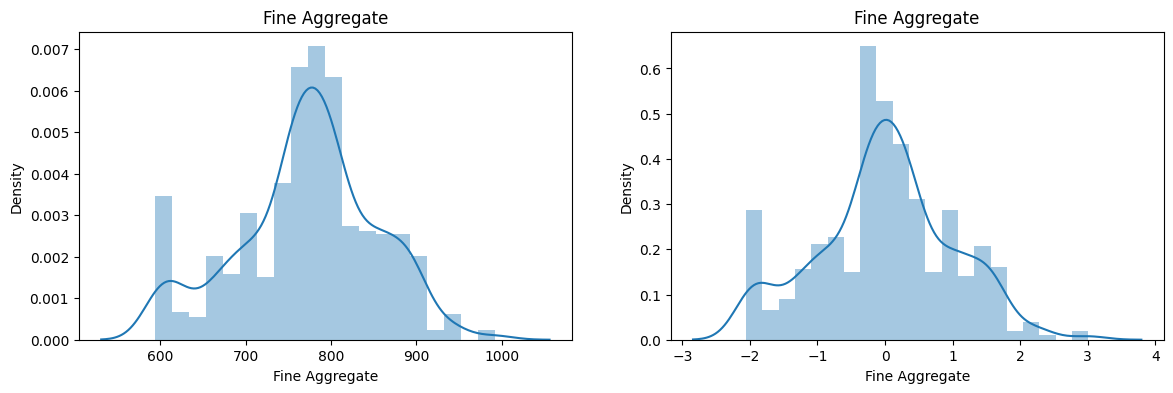

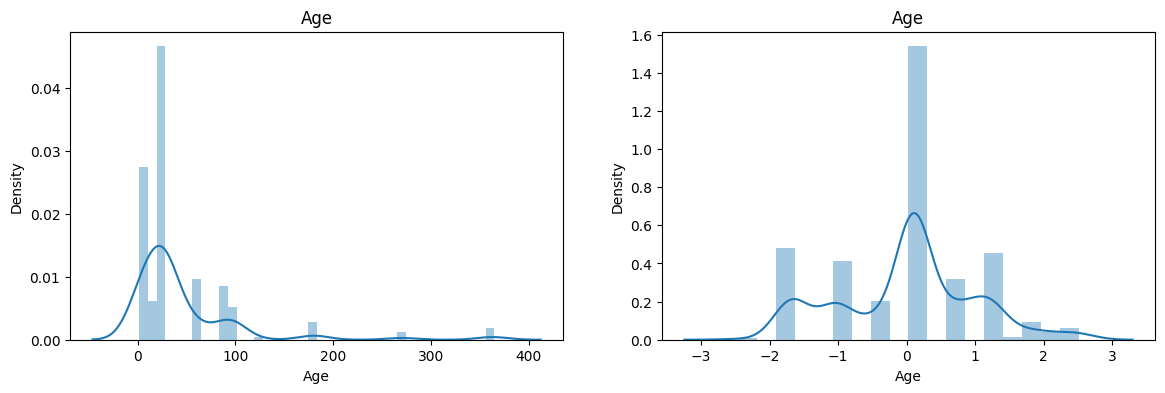

In [141]:
for col in X_train_transformed.columns :
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    plt.title(col)
    sns.distplot(X_train_transformed[col])

In [142]:
#Yeo Johnson Transform
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.816190650848122


cols  Yeo_Johnson_lambdas
0              Cement             0.174348
1  Blast Furnace Slag             0.015715
2             Fly Ash            -0.161447
3               Water             0.771307
4    Superplasticizer             0.253935
5    Coarse Aggregate             1.130050
6      Fine Aggregate             1.783100
7                 Age             0.019885

In [143]:
#cv
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625144470905

In [144]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)


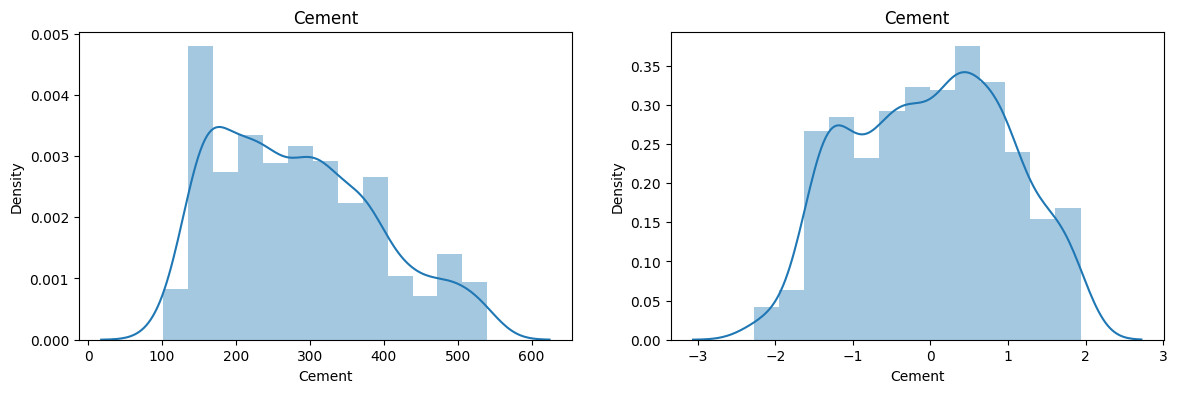

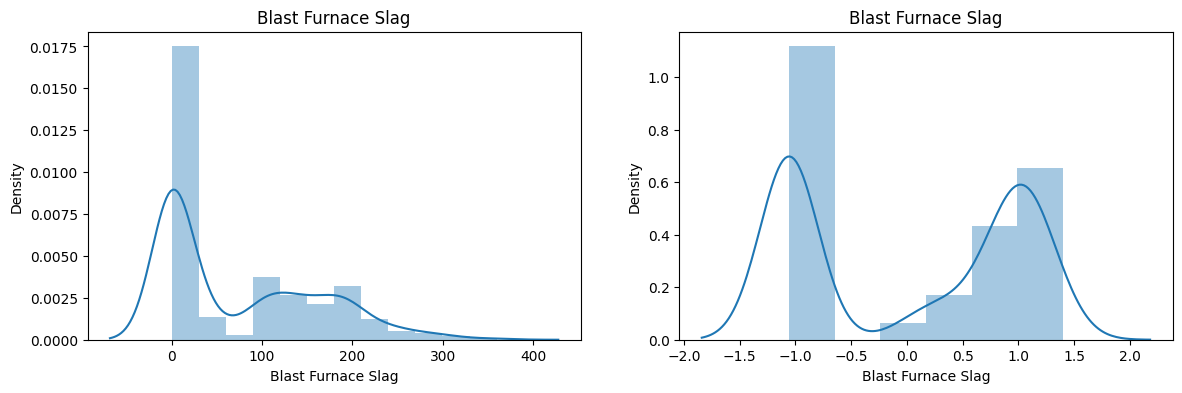

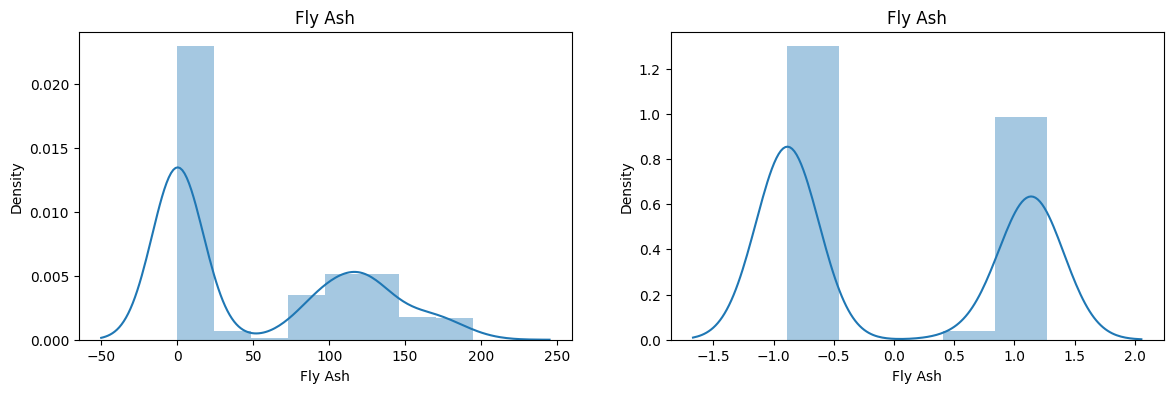

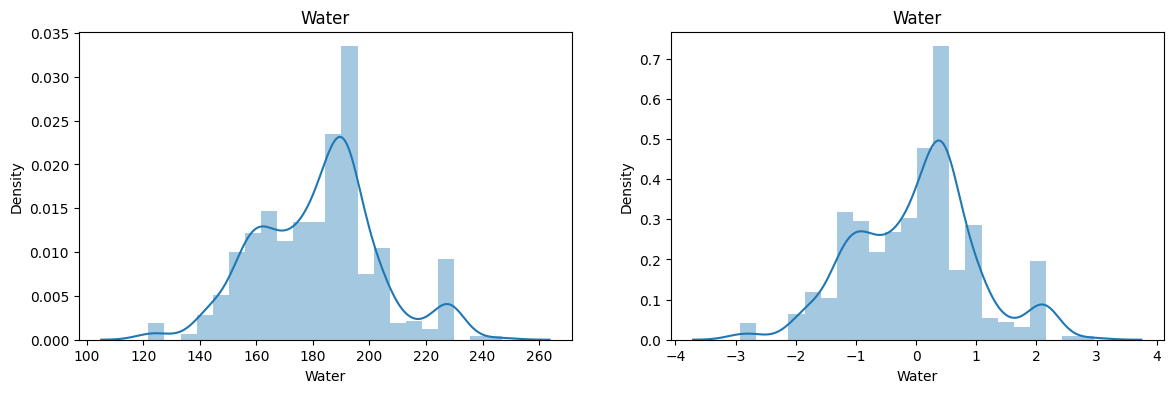

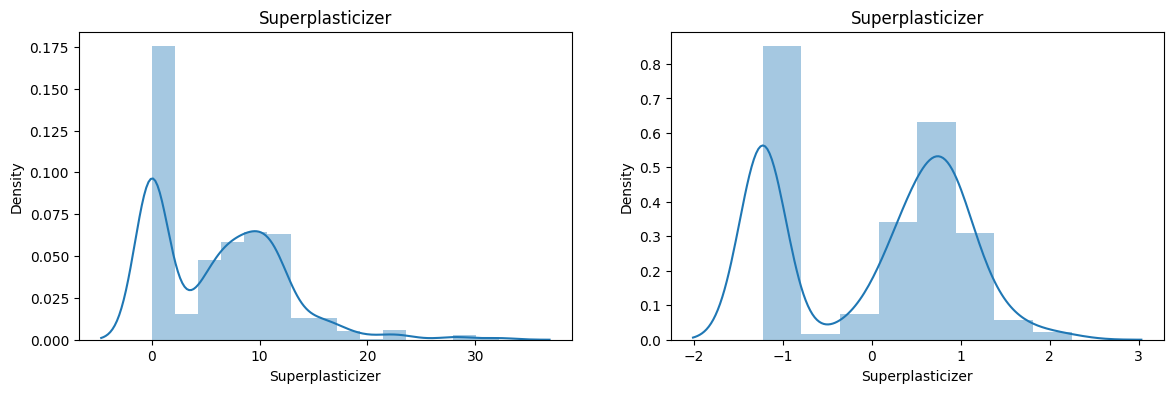

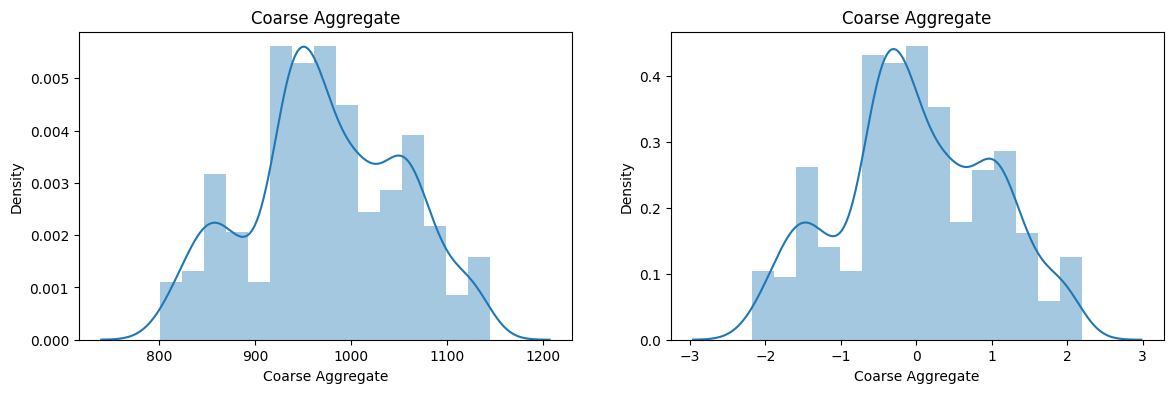

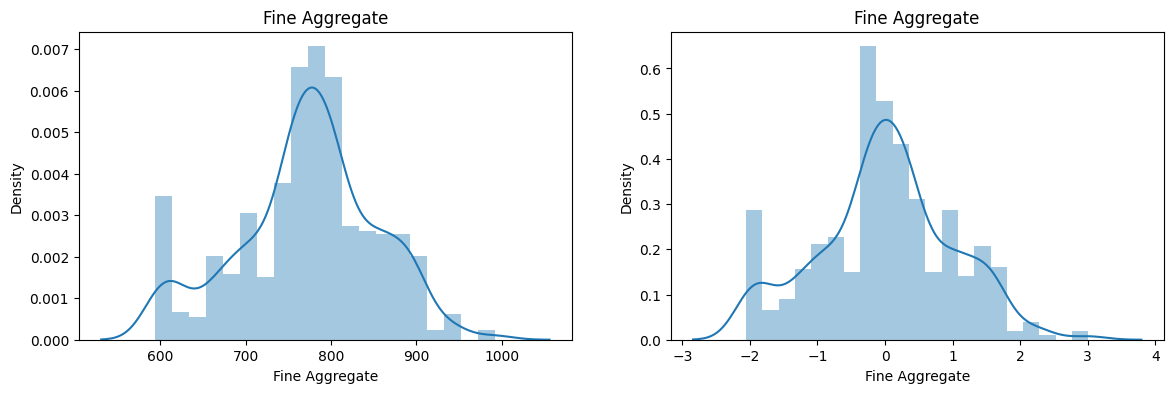

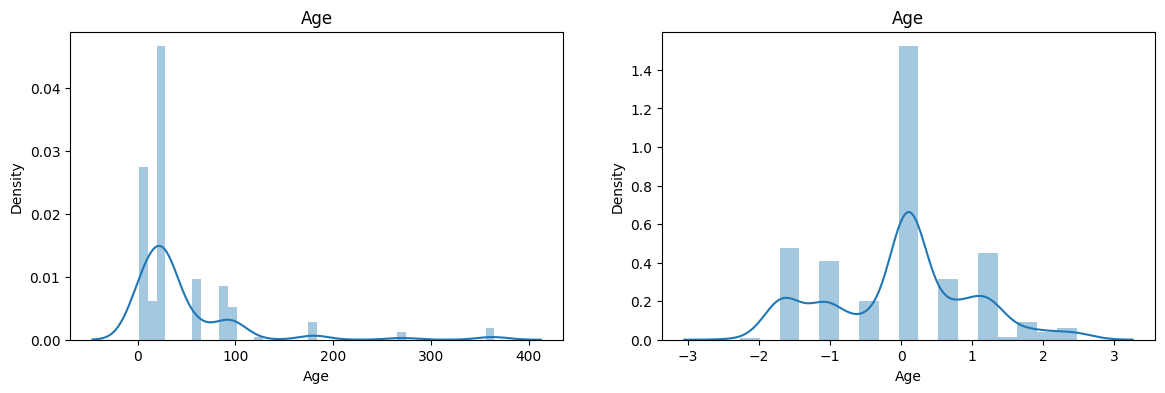

In [145]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [146]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})


cols  box_cox_lambdas  Yeo_Johnson_lambdas
0              Cement         0.169544             0.174348
1  Blast Furnace Slag         0.016633             0.015715
2             Fly Ash        -0.136480            -0.161447
3               Water         0.808438             0.771307
4    Superplasticizer         0.264160             0.253935
5    Coarse Aggregate         1.129395             1.130050
6      Fine Aggregate         1.830764             1.783100
7                 Age         0.001771             0.019885

**Binning**

In [147]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [148]:
df = sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [149]:
df = df[['age','fare','survived']]
df.head()

age     fare  survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [150]:
df.dropna(inplace=True)

In [151]:
df.shape

(714, 3)

In [152]:
X=df.iloc[:,:2]
y= df.iloc[:,2]

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

age     fare
328  31.0  20.5250
73   26.0  14.4542
253  30.0  16.1000
719  33.0   7.7750
666  25.0  13.0000

In [154]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)


0.6153846153846154

In [155]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6303012519561815

In [156]:
#applyting kBins
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy ='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

trf = ColumnTransformer([
    ('first',kbin_age,[0]),('second',kbin_fare,[1])
])

In [157]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [158]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [159]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [160]:
output = pd.DataFrame({
    'age':X_train['age'],
    'age_trf':X_train_transformed[:,0],
    'fare':X_train['fare'],
    'fare_trf':X_train_transformed[:,1]
})


In [161]:
output['age_labels']= pd.cut(x=X_train['age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']= pd.cut(x=X_train['fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
output.sample(7)

age  age_trf      fare  fare_trf    age_labels       fare_labels
25   38.0     11.0   31.3875      11.0  (35.0, 38.0]  (31.275, 51.479]
408  21.0      4.0    7.7750       2.0  (19.0, 21.0]     (7.25, 7.775]
173  21.0      4.0    7.9250       3.0  (19.0, 21.0]    (7.896, 8.158]
734  23.0      5.0   13.0000       6.0  (21.0, 23.0]      (10.5, 13.0]
780  13.0      1.0    7.2292       0.0   (6.0, 16.0]       (0.0, 7.25]
192  19.0      3.0    7.8542       2.0  (16.0, 19.0]    (7.775, 7.896]
742  21.0      4.0  262.3750      14.0  (19.0, 21.0]  (108.9, 512.329]

In [162]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)
y_pred2 = clf.predict(X_test_transformed)
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [163]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6344874804381847

In [164]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6723982785602504


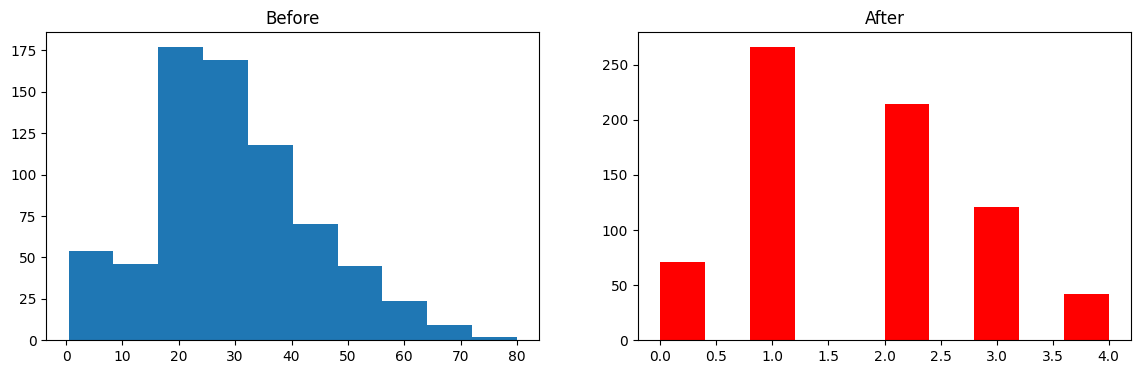

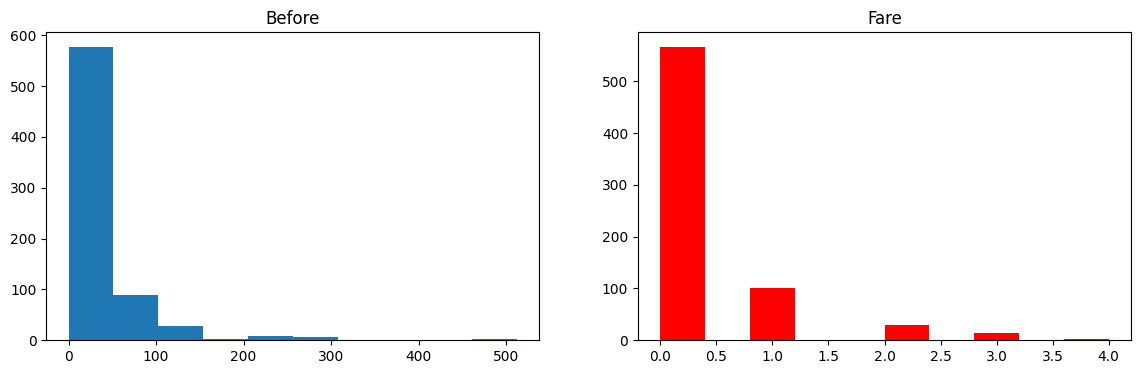

In [165]:
discretize(5,'kmeans')

**binarization**

In [166]:
df = sns.load_dataset('titanic')
df = df[['age','fare','sibsp','parch','survived']]
df.head()

age     fare  sibsp  parch  survived
0  22.0   7.2500      1      0         0
1  38.0  71.2833      1      0         1
2  26.0   7.9250      0      0         1
3  35.0  53.1000      1      0         1
4  35.0   8.0500      0      0         0

In [167]:
df.isnull().sum()

age         177
fare          0
sibsp         0
parch         0
survived      0
dtype: int64

In [168]:
df.dropna(inplace=True)
df.head()

age     fare  sibsp  parch  survived
0  22.0   7.2500      1      0         0
1  38.0  71.2833      1      0         1
2  26.0   7.9250      0      0         1
3  35.0  53.1000      1      0         1
4  35.0   8.0500      0      0         0

In [169]:
df['family']= df['sibsp']+df['parch']
df.drop(columns=['sibsp','parch'],inplace=True)
df.head()

age     fare  survived  family
0  22.0   7.2500         0       1
1  38.0  71.2833         1       1
2  26.0   7.9250         1       0
3  35.0  53.1000         1       1
4  35.0   8.0500         0       0

In [170]:
X = df.drop(columns=['survived'])
y = df['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()


age     fare  family
328  31.0  20.5250       2
73   26.0  14.4542       1
253  30.0  16.1000       1
719  33.0   7.7750       0
666  25.0  13.0000       0

In [171]:
#without  binarization
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6485133020344288

In [172]:
#with binarization
from sklearn.preprocessing import Binarizer

In [173]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [174]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])


family   Age      Fare
0       1.0  31.0   20.5250
1       1.0  26.0   14.4542
2       1.0  30.0   16.1000
3       0.0  33.0    7.7750
4       0.0  25.0   13.0000
..      ...   ...       ...
566     1.0  46.0   61.1750
567     0.0  25.0   13.0000
568     0.0  41.0  134.5000
569     1.0  33.0   20.5250
570     0.0  33.0    7.8958

[571 rows x 3 columns]

In [175]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)


0.5944055944055944

In [176]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6276017214397497

**Handling Mixed vairables**

In [177]:
df = pd.read_csv('/kaggle/input/titanic-mixedvar/titanic.csv')
df.head()

Cabin            Ticket number  Survived
0   NaN         A/5 21171      5         0
1   C85          PC 17599      3         1
2   NaN  STON/O2. 3101282      6         1
3  C123            113803      3         1
4   NaN            373450      A         0

In [178]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'pssengers Travelling with')

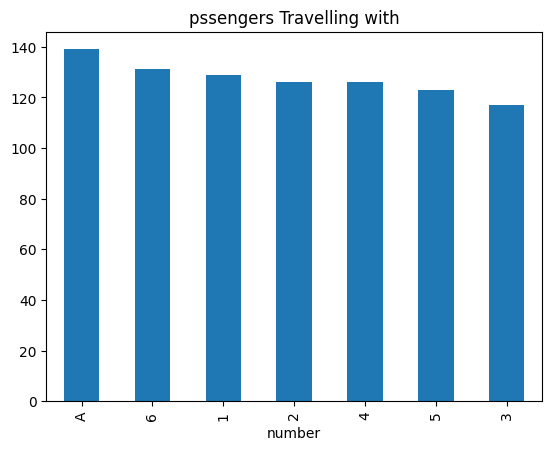

In [179]:
fig = df['number'].value_counts().plot.bar()
fig.set_title("pssengers Travelling with")

In [180]:
df['number_numerical']= pd.to_numeric(df['number'],errors='coerce', downcast='integer')

In [181]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'], np.nan)# where(condition , if true , if false)

In [182]:
df.head()

Cabin            Ticket number  Survived  number_numerical  \
0   NaN         A/5 21171      5         0               5.0   
1   C85          PC 17599      3         1               3.0   
2   NaN  STON/O2. 3101282      6         1               6.0   
3  C123            113803      3         1               3.0   
4   NaN            373450      A         0               NaN   

  number_categorical  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                  A

In [183]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [184]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [185]:
df['cabin_num']=df['Cabin'].str.extract('(/d+)')# regex to extract continious digits from String 
df['cabin_cat'] = df['Cabin'].str[0]

df.head()

Cabin            Ticket number  Survived  number_numerical  \
0   NaN         A/5 21171      5         0               5.0   
1   C85          PC 17599      3         1               3.0   
2   NaN  STON/O2. 3101282      6         1               6.0   
3  C123            113803      3         1               3.0   
4   NaN            373450      A         0               NaN   

  number_categorical cabin_num cabin_cat  
0                NaN       NaN       NaN  
1                NaN       NaN         C  
2                NaN       NaN       NaN  
3                NaN       NaN         C  
4                  A       NaN       NaN

<Axes: xlabel='cabin_cat'>

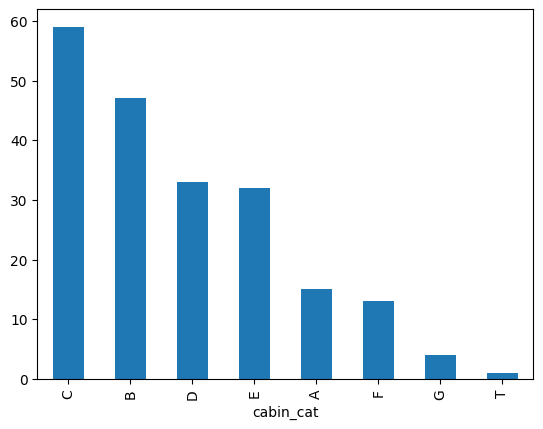

In [186]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [187]:
df['Ticket'].apply(lambda s: s.split()[-1])

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket, Length: 891, dtype: object

In [188]:
df['Ticket_num'] = df['Ticket'].apply(lambda s:s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'], errors='coerce' , downcast='integer')

df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

Cabin            Ticket number  Survived  number_numerical  \
0    NaN         A/5 21171      5         0               5.0   
1    C85          PC 17599      3         1               3.0   
2    NaN  STON/O2. 3101282      6         1               6.0   
3   C123            113803      3         1               3.0   
4    NaN            373450      A         0               NaN   
5    NaN            330877      2         0               2.0   
6    E46             17463      2         0               2.0   
7    NaN            349909      5         0               5.0   
8    NaN            347742      1         1               1.0   
9    NaN            237736      A         1               NaN   
10    G6           PP 9549      1         1               1.0   
11  C103            113783      1         1               1.0   
12   NaN         A/5. 2151      3         0               3.0   
13   NaN            347082      3         0               3.0   
14   NaN            350406      5         0               5.0   
15   NaN            248706      3         1               3.0   
16   NaN            382652      3         0               3.0   
17   NaN            244373      2         1               2.0   
18   NaN            345763      5         0               5.0   
19   NaN              2649      4         1               4.0   

   number_categorical cabin_num cabin_cat  Ticket_num ticket_cat  
0                 NaN       NaN       NaN     21171.0        A/5  
1                 NaN       NaN         C     17599.0         PC  
2                 NaN       NaN       NaN   3101282.0   STON/O2.  
3                 NaN       NaN         C    113803.0        NaN  
4                   A       NaN       NaN    373450.0        NaN  
5                 NaN       NaN       NaN    330877.0        NaN  
6                 NaN       NaN         E     17463.0        NaN  
7                 NaN       NaN       NaN    349909.0        NaN  
8                 NaN       NaN       NaN    347742.0        NaN  
9                   A       NaN       NaN    237736.0        NaN  
10                NaN       NaN         G      9549.0         PP  
11                NaN       NaN         C    113783.0        NaN  
12                NaN       NaN       NaN      2151.0       A/5.  
13                NaN       NaN       NaN    347082.0        NaN  
14                NaN       NaN       NaN    350406.0        NaN  
15                NaN       NaN       NaN    248706.0        NaN  
16                NaN       NaN       NaN    382652.0        NaN  
17                NaN       NaN       NaN    244373.0        NaN  
18                NaN       NaN       NaN    345763.0        NaN  
19                NaN       NaN       NaN      2649.0        NaN

In [189]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

**Handling Date and Time**

In [190]:
date = pd.read_csv("/kaggle/input/date-time-examples/orders.csv")
time = pd.read_csv("/kaggle/input/date-time-examples/messages.csv")

In [191]:
date.head() 

date  product_id  city_id  orders
0  2019-12-10        5628       25       3
1  2018-08-15        3646       14     157
2  2018-10-23        1859       25       1
3  2019-08-17        7292       25       1
4  2019-01-06        4344       25       3

In [192]:
time.head() 

date                                                msg
0  2013-12-15 00:50:00                           ищу на сегодня мужика 37
1  2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2  2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576
3  2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4  2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше

In [193]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [194]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [195]:
date['date'] = pd.to_datetime(date['date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [196]:
#Extract year
date['date_year'] = date['date'].dt.year
date.head()

date  product_id  city_id  orders  date_year
0 2019-12-10        5628       25       3       2019
1 2018-08-15        3646       14     157       2018
2 2018-10-23        1859       25       1       2018
3 2019-08-17        7292       25       1       2019
4 2019-01-06        4344       25       3       2019

In [197]:
date['date_month'] = date['date'].dt.month 
date.head()

date  product_id  city_id  orders  date_year  date_month
0 2019-12-10        5628       25       3       2019          12
1 2018-08-15        3646       14     157       2018           8
2 2018-10-23        1859       25       1       2018          10
3 2019-08-17        7292       25       1       2019           8
4 2019-01-06        4344       25       3       2019           1

In [198]:
date['date_month_name'] = date['date'].dt.month_name()
date.head()

date  product_id  city_id  orders  date_year  date_month  \
0 2019-12-10        5628       25       3       2019          12   
1 2018-08-15        3646       14     157       2018           8   
2 2018-10-23        1859       25       1       2018          10   
3 2019-08-17        7292       25       1       2019           8   
4 2019-01-06        4344       25       3       2019           1   

  date_month_name  
0        December  
1          August  
2         October  
3          August  
4         January

In [199]:
date['date_day'] = date['date'].dt.day
date.head()

date  product_id  city_id  orders  date_year  date_month  \
0 2019-12-10        5628       25       3       2019          12   
1 2018-08-15        3646       14     157       2018           8   
2 2018-10-23        1859       25       1       2018          10   
3 2019-08-17        7292       25       1       2019           8   
4 2019-01-06        4344       25       3       2019           1   

  date_month_name  date_day  
0        December        10  
1          August        15  
2         October        23  
3          August        17  
4         January         6

In [200]:
date['day_dow']= date['date'].dt.dayofweek
date.head()

date  product_id  city_id  orders  date_year  date_month  \
0 2019-12-10        5628       25       3       2019          12   
1 2018-08-15        3646       14     157       2018           8   
2 2018-10-23        1859       25       1       2018          10   
3 2019-08-17        7292       25       1       2019           8   
4 2019-01-06        4344       25       3       2019           1   

  date_month_name  date_day  day_dow  
0        December        10        1  
1          August        15        2  
2         October        23        1  
3          August        17        5  
4         January         6        6

In [201]:
date['day_dow_name']= date['date'].dt.day_name()
date.head()

date  product_id  city_id  orders  date_year  date_month  \
0 2019-12-10        5628       25       3       2019          12   
1 2018-08-15        3646       14     157       2018           8   
2 2018-10-23        1859       25       1       2018          10   
3 2019-08-17        7292       25       1       2019           8   
4 2019-01-06        4344       25       3       2019           1   

  date_month_name  date_day  day_dow day_dow_name  
0        December        10        1      Tuesday  
1          August        15        2    Wednesday  
2         October        23        1      Tuesday  
3          August        17        5     Saturday  
4         January         6        6       Sunday

In [202]:
date['date_is_weekend'] = np.where(date['day_dow_name'].isin(['Sunday','Saturday']),1,0)
date.drop(columns=['product_id','city_id','orders']).head()

date  date_year  date_month date_month_name  date_day  day_dow  \
0 2019-12-10       2019          12        December        10        1   
1 2018-08-15       2018           8          August        15        2   
2 2018-10-23       2018          10         October        23        1   
3 2019-08-17       2019           8          August        17        5   
4 2019-01-06       2019           1         January         6        6   

  day_dow_name  date_is_weekend  
0      Tuesday                0  
1    Wednesday                0  
2      Tuesday                0  
3     Saturday                1  
4       Sunday                1

In [203]:
date['date_week'] = date['date'].dt.isocalendar().week

date.drop(columns=['product_id','city_id','orders']).head()

date  date_year  date_month date_month_name  date_day  day_dow  \
0 2019-12-10       2019          12        December        10        1   
1 2018-08-15       2018           8          August        15        2   
2 2018-10-23       2018          10         October        23        1   
3 2019-08-17       2019           8          August        17        5   
4 2019-01-06       2019           1         January         6        6   

  day_dow_name  date_is_weekend  date_week  
0      Tuesday                0         50  
1    Wednesday                0         33  
2      Tuesday                0         43  
3     Saturday                1         33  
4       Sunday                1          1

In [204]:
date['quarter'] = date['date'].dt.quarter

date.drop(columns=['product_id','city_id','orders']).head()


date  date_year  date_month date_month_name  date_day  day_dow  \
0 2019-12-10       2019          12        December        10        1   
1 2018-08-15       2018           8          August        15        2   
2 2018-10-23       2018          10         October        23        1   
3 2019-08-17       2019           8          August        17        5   
4 2019-01-06       2019           1         January         6        6   

  day_dow_name  date_is_weekend  date_week  quarter  
0      Tuesday                0         50        4  
1    Wednesday                0         33        3  
2      Tuesday                0         43        4  
3     Saturday                1         33        3  
4       Sunday                1          1        1

In [205]:
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)

date.drop(columns=['product_id','city_id','orders']).head()

date  date_year  date_month date_month_name  date_day  day_dow  \
0 2019-12-10       2019          12        December        10        1   
1 2018-08-15       2018           8          August        15        2   
2 2018-10-23       2018          10         October        23        1   
3 2019-08-17       2019           8          August        17        5   
4 2019-01-06       2019           1         January         6        6   

  day_dow_name  date_is_weekend  date_week  quarter  semester  
0      Tuesday                0         50        4         2  
1    Wednesday                0         33        3         2  
2      Tuesday                0         43        4         2  
3     Saturday                1         33        3         2  
4       Sunday                1          1        1         1

In [206]:
import datetime

today = datetime.datetime.today()

today  #gives current date and time from the system 

datetime.datetime(2025, 12, 19, 5, 25, 32, 467562)

In [207]:
today -date['date']

0     2201 days 05:25:32.467562
1     2683 days 05:25:32.467562
2     2614 days 05:25:32.467562
3     2316 days 05:25:32.467562
4     2539 days 05:25:32.467562
                 ...           
995   2629 days 05:25:32.467562
996   2570 days 05:25:32.467562
997   2418 days 05:25:32.467562
998   2483 days 05:25:32.467562
999   2257 days 05:25:32.467562
Name: date, Length: 1000, dtype: timedelta64[ns]

In [208]:
(today - date['date']).dt.days

0      2201
1      2683
2      2614
3      2316
4      2539
       ... 
995    2629
996    2570
997    2418
998    2483
999    2257
Name: date, Length: 1000, dtype: int64

In [209]:
today = pd.Timestamp.today()


In [210]:
months_passed = (today.year - date['date'].dt.year) * 12 + (today.month - date['date'].dt.month)
#months passed
months_passed

0      72
1      88
2      86
3      76
4      83
       ..
995    86
996    84
997    79
998    81
999    74
Name: date, Length: 1000, dtype: int32

In [211]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [212]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [213]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [214]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

date                                                msg  \
0 2013-12-15 00:50:00                           ищу на сегодня мужика 37   
1 2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826   
2 2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576   
3 2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...   
4 2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше   

   hour  min  sec  
0     0   50    0  
1    23   40    0  
2     0   21    0  
3     0   31    0  
4    23   11    0

In [215]:
#Extract time part
time['time'] = time['date'].dt.time

time.head()

date                                                msg  \
0 2013-12-15 00:50:00                           ищу на сегодня мужика 37   
1 2014-04-29 23:40:00   ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826   
2 2012-12-30 00:21:00           Днепр.м 43 позн.с д/ж *.о  067.16.34.576   
3 2014-11-28 00:31:00  КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...   
4 2013-10-26 23:11:00    Зая я тебя никогда не обижу  люблю тебя!)  Даше   

   hour  min  sec      time  
0     0   50    0  00:50:00  
1    23   40    0  23:40:00  
2     0   21    0  00:21:00  
3     0   31    0  00:31:00  
4    23   11    0  23:11:00

In [216]:
today - time['date']

0     4387 days 04:35:32.528811
1     4251 days 05:45:32.528811
2     4737 days 05:04:32.528811
3     4039 days 04:54:32.528811
4     4436 days 06:14:32.528811
                 ...           
995   5026 days 04:35:32.528811
996   4347 days 06:11:32.528811
997   4812 days 05:48:32.528811
998   4928 days 05:51:32.528811
999   4200 days 06:00:32.528811
Name: date, Length: 1000, dtype: timedelta64[ns]

In [217]:
# in seconds

(today - time['date'])/np.timedelta64(1,'s')

0      3.790533e+08
1      3.673071e+08
2      4.092951e+08
3      3.489873e+08
4      3.832929e+08
           ...     
995    4.342629e+08
996    3.756031e+08
997    4.157777e+08
998    4.258003e+08
999    3.629016e+08
Name: date, Length: 1000, dtype: float64

In [218]:
# in minutes

(today - time['date'])/np.timedelta64(1,'m')

0      6.317556e+06
1      6.121786e+06
2      6.821585e+06
3      5.816455e+06
4      6.388215e+06
           ...     
995    7.237716e+06
996    6.260052e+06
997    6.929629e+06
998    7.096672e+06
999    6.048361e+06
Name: date, Length: 1000, dtype: float64

In [219]:
# in hours

(today - time['date'])/np.timedelta64(1,'h')

0      105292.592369
1      102029.759036
2      113693.075702
3       96940.909036
4      106470.242369
           ...      
995    120628.592369
996    104334.192369
997    115493.809036
998    118277.859036
999    100806.009036
Name: date, Length: 1000, dtype: float64

**Complete Case Analysis**

In [220]:
df = pd.read_csv('/kaggle/input/data-science-job/data_science_job.csv')
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline  experience company_size    company_type  training_hours  \
0             STEM        20.0          NaN             NaN            36.0   
1             STEM        15.0        50-99         Pvt Ltd            47.0   
2             STEM         5.0          NaN             NaN            83.0   
3  Business Degree         0.0          NaN         Pvt Ltd            52.0   
4             STEM        20.0        50-99  Funded Startup             8.0   

   target  
0     1.0  
1     0.0  
2     0.0  
3     1.0  
4     0.0

In [221]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [222]:
df.shape

(19158, 13)

In [223]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() >0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [224]:
df[cols].sample(7)

city_development_index enrolled_university education_level  experience  \
12942                   0.796    Full time course  Primary School         2.0   
6739                    0.920       no_enrollment         Masters         1.0   
15075                   0.693       no_enrollment        Graduate         7.0   
3734                    0.827       no_enrollment        Graduate        20.0   
8803                    0.939       no_enrollment        Graduate        14.0   
13766                   0.926       no_enrollment         Masters        20.0   
15815                   0.579    Part time course        Graduate         4.0   

       training_hours  
12942            11.0  
6739             78.0  
15075             4.0  
3734             65.0  
8803             41.0  
13766            64.0  
15815            28.0

In [225]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [226]:
len(df[cols].dropna())/len(df)  # its a check of if we remove all the rows where even a single value is missing , then what is the ratio of complete/totalRows , to see how many rows are clean  

0.8968577095730244

In [227]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

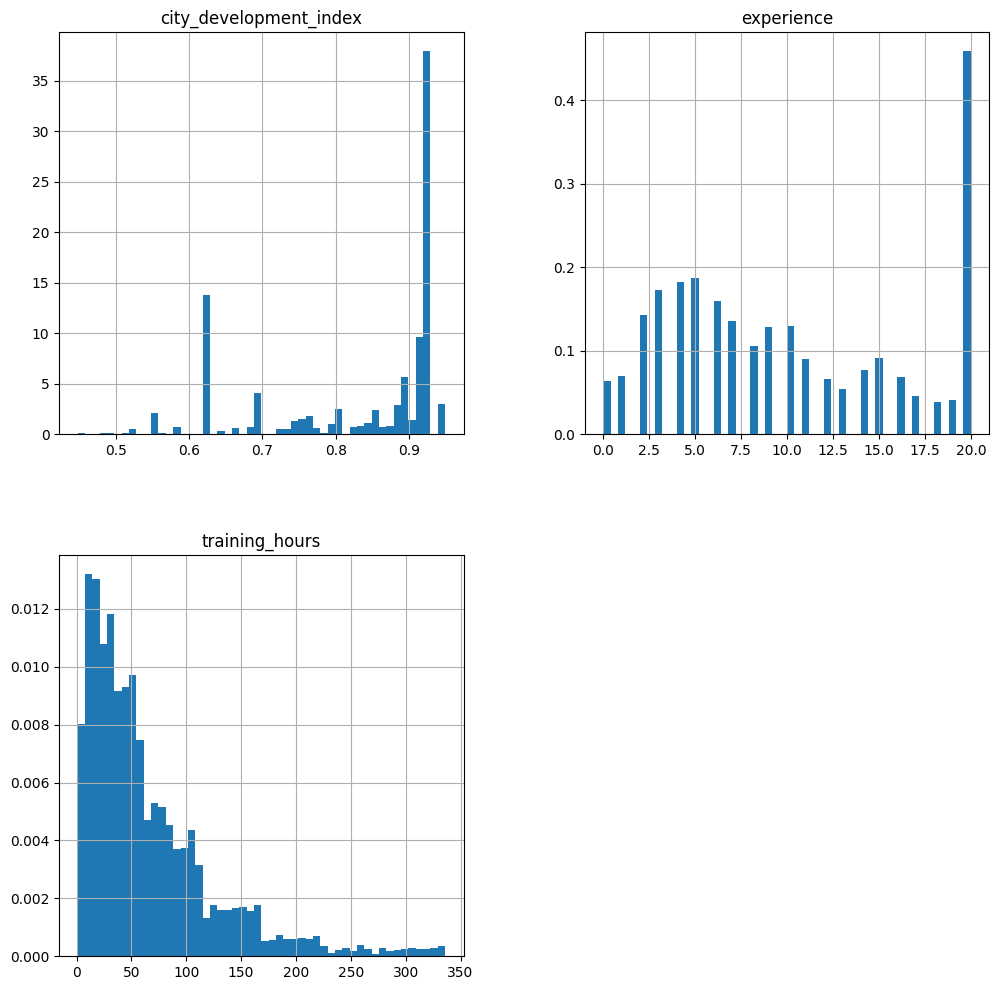

In [228]:
new_df.hist(bins=50 , density=True , figsize = (12,12))

<Axes: >

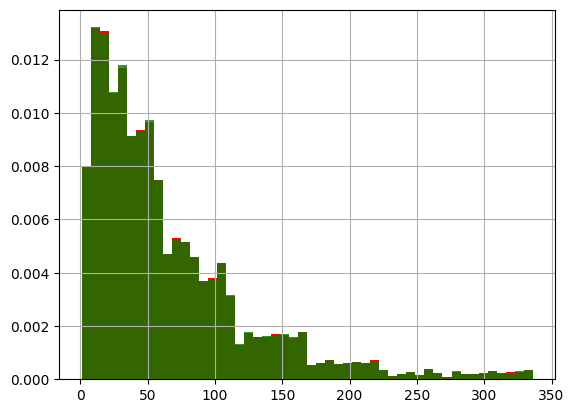

In [229]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

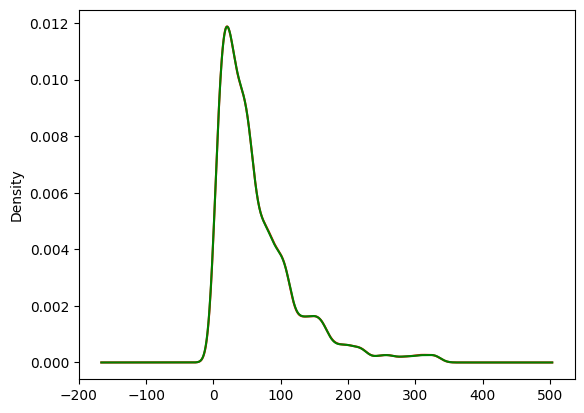

In [230]:
# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

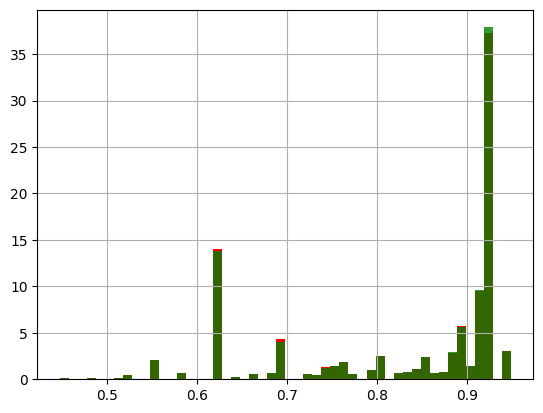

In [231]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

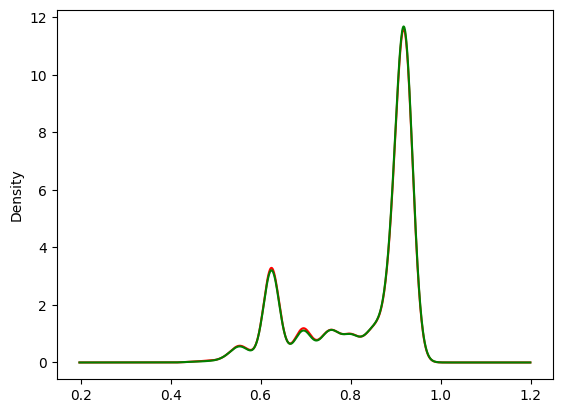

In [232]:
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

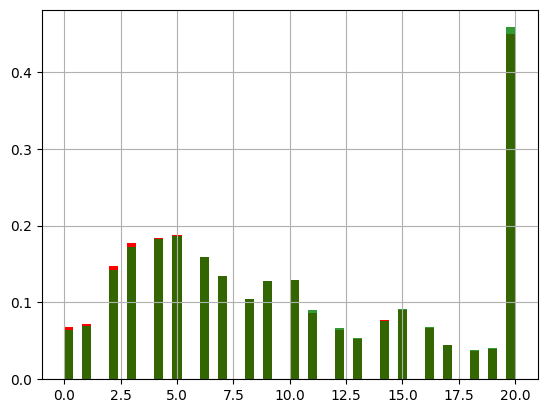

In [233]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

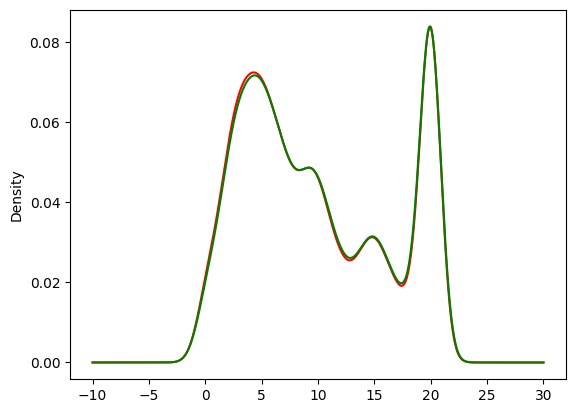

In [234]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [235]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

original       cca
enrolled_university                    
no_enrollment        0.721213  0.735188
Full time course     0.196106  0.200733
Part time course     0.062533  0.064079

In [236]:
temp = pd.concat([
    df['education_level'].value_counts() / len(df) ,
    df['education_level'].value_counts() / len(new_df)
],axis=1)

temp.columns = ['original','cca']
temp

original       cca
education_level                    
Graduate         0.605387  0.675009
Masters          0.227633  0.253812
High School      0.105282  0.117390
Phd              0.021610  0.024095
Primary School   0.016077  0.017926

**Imputing Numerical Data**

arbitary value inputation

In [237]:
df = pd.read_csv('/kaggle/input/titanic-toy/titanic_toy.csv')
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [238]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [239]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [240]:

X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [241]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


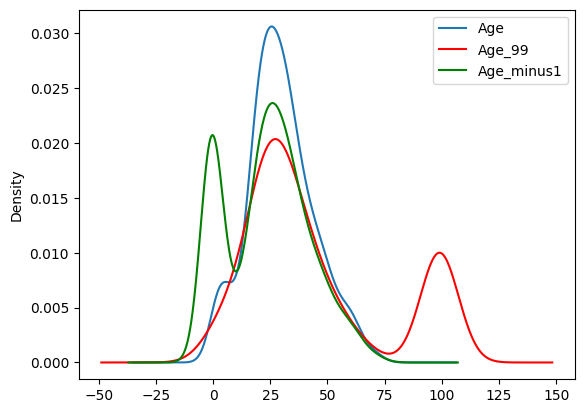

In [242]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

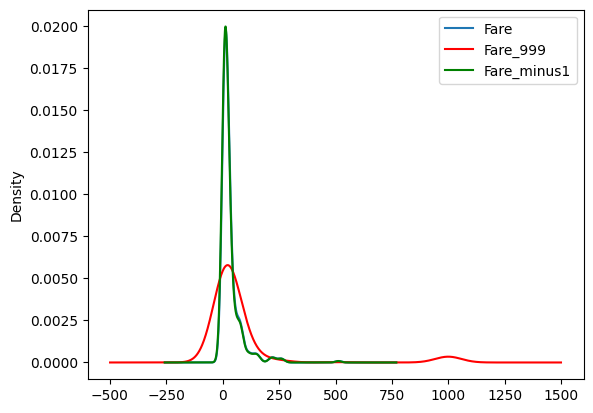

In [243]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [244]:

X_train.cov() #covariance

Age         Fare     Family      Age_99  Age_minus1  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917 -101.671097  125.558364   
Family        -6.498901    17.258917   2.735252   -7.387287   -4.149246   
Age_99       204.349513  -101.671097  -7.387287  951.727557 -189.535540   
Age_minus1   204.349513   125.558364  -4.149246 -189.535540  318.089620   
Fare_999     162.793430  2448.197914  11.528625 -159.931663  257.379887   
Fare_minus1   63.321188  2448.197914  16.553989  -94.317400  114.394141   

                 Fare_999  Fare_minus1  
Age            162.793430    63.321188  
Fare          2448.197914  2448.197914  
Family          11.528625    16.553989  
Age_99        -159.931663   -94.317400  
Age_minus1     257.379887   114.394141  
Fare_999     47219.202652   762.474982  
Fare_minus1    762.474982  2378.567678

In [245]:

X_train.corr()

Age      Fare    Family    Age_99  Age_minus1  Fare_999  \
Age          1.000000  0.092644 -0.299113  1.000000    1.000000  0.051179   
Fare         0.092644  1.000000  0.208268 -0.066273    0.142022  1.000000   
Family      -0.299113  0.208268  1.000000 -0.144787   -0.140668  0.032079   
Age_99       1.000000 -0.066273 -0.144787  1.000000   -0.344476 -0.023857   
Age_minus1   1.000000  0.142022 -0.140668 -0.344476    1.000000  0.066411   
Fare_999     0.051179  1.000000  0.032079 -0.023857    0.066411  1.000000   
Fare_minus1  0.084585  1.000000  0.205233 -0.062687    0.131514  0.071946   

             Fare_minus1  
Age             0.084585  
Fare            1.000000  
Family          0.205233  
Age_99         -0.062687  
Age_minus1      0.131514  
Fare_999        0.071946  
Fare_minus1     1.000000

In [246]:
#using skelarn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [247]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [248]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [249]:
trf.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [250]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [251]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [252]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [253]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

Mean-Median_imputation


In [254]:
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [255]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [256]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [257]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [258]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [259]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [260]:
X_train.sample(7)

Age      Fare  Family  Age_median   Age_mean  Fare_median  Fare_mean
374   3.0   21.0750       4        3.00   3.000000      21.0750    21.0750
151  22.0   66.6000       1       22.00  22.000000      66.6000    66.6000
527   NaN  221.7792       0       28.75  29.785904     221.7792   221.7792
599  49.0   56.9292       1       49.00  49.000000      56.9292    56.9292
661  40.0    7.2250       0       40.00  40.000000       7.2250     7.2250
369  24.0   69.3000       0       24.00  24.000000      69.3000    69.3000
888   NaN   23.4500       3       28.75  29.785904      23.4500    23.4500

In [261]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


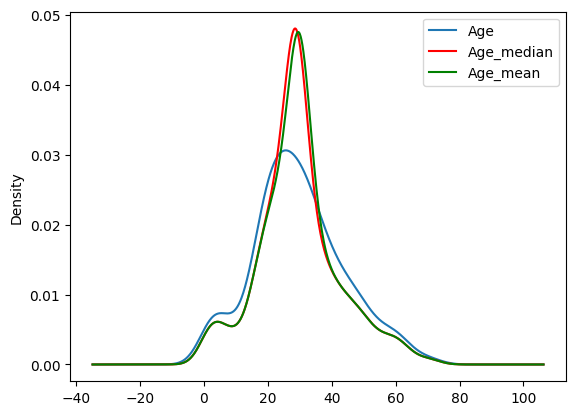

In [262]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

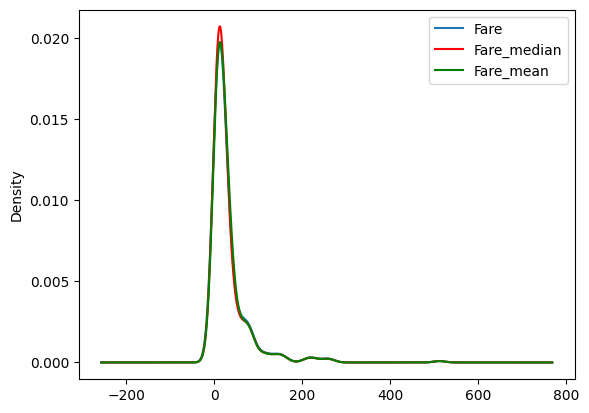

In [263]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [264]:
X_train.cov()

Age         Fare     Family  Age_median    Age_mean  \
Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
Fare          70.719262  2448.197914  17.258917   57.957599   55.603719   
Family        -6.498901    17.258917   2.735252   -5.112563   -5.146106   
Age_median   204.349513    57.957599  -5.112563  161.989566  161.812625   
Age_mean     204.349513    55.603719  -5.146106  161.812625  161.812625   
Fare_median   64.858859  2448.197914  16.476305   53.553455   51.358000   
Fare_mean     66.665205  2448.197914  16.385048   55.023037   52.788341   

             Fare_median    Fare_mean  
Age            64.858859    66.665205  
Fare         2448.197914  2448.197914  
Family         16.476305    16.385048  
Age_median     53.553455    55.023037  
Age_mean       51.358000    52.788341  
Fare_median  2340.091022  2324.238526  
Fare_mean    2324.238526  2324.238526

In [265]:
X_train.corr()

Age      Fare    Family  Age_median  Age_mean  Fare_median  \
Age          1.000000  0.092644 -0.299113    1.000000  1.000000     0.087356   
Fare         0.092644  1.000000  0.208268    0.091757  0.088069     1.000000   
Family      -0.299113  0.208268  1.000000   -0.242883 -0.244610     0.205942   
Age_median   1.000000  0.091757 -0.242883    1.000000  0.999454     0.086982   
Age_mean     1.000000  0.088069 -0.244610    0.999454  1.000000     0.083461   
Fare_median  0.087356  1.000000  0.205942    0.086982  0.083461     1.000000   
Fare_mean    0.090156  1.000000  0.205499    0.089673  0.086078     0.996607   

             Fare_mean  
Age           0.090156  
Fare          1.000000  
Family        0.205499  
Age_median    0.089673  
Age_mean      0.086078  
Fare_median   0.996607  
Fare_mean     1.000000

<Axes: >

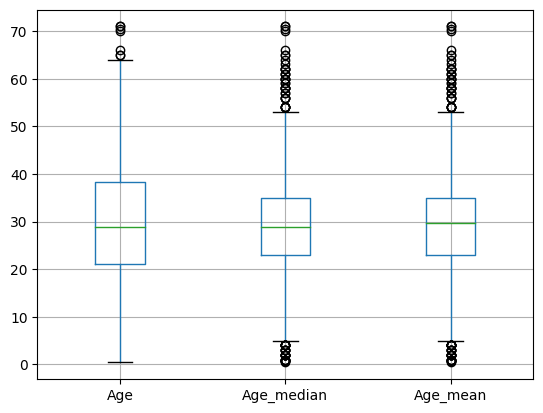

In [266]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

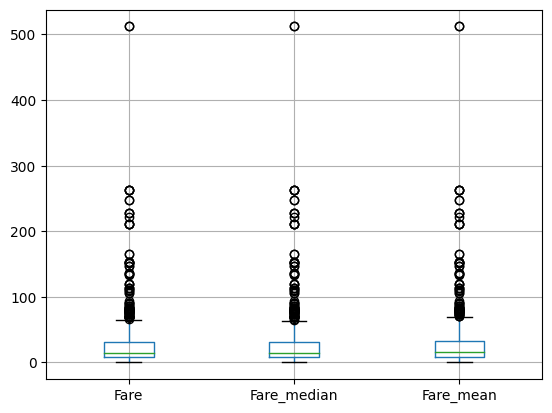

In [267]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [268]:
#using sklearn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [269]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [270]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [271]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [272]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [273]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [274]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

**Handling Missing Categorical Data**

freq value imputation

In [275]:
df = pd.read_csv('/kaggle/input/train-dataset/train.csv')

In [276]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [277]:
df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

<Axes: xlabel='GarageQual'>

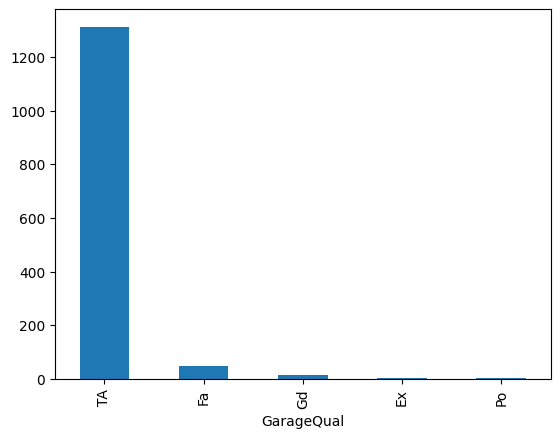

In [278]:
df['GarageQual'].value_counts().plot(kind='bar')

In [279]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

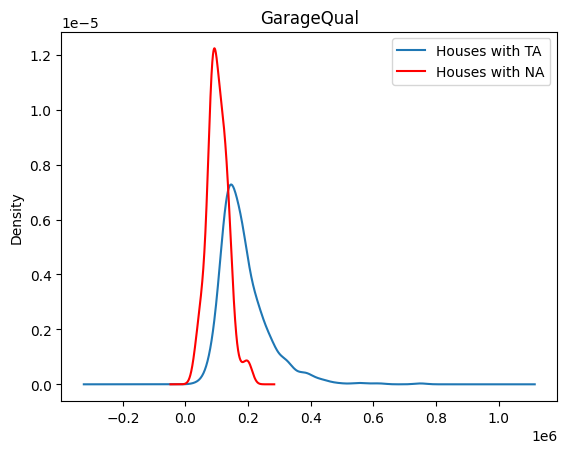

In [280]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')
#if the distribution of NA meets TA , then TA can be used to reaplce NA values 

In [281]:
temp = df[df['GarageQual']=='TA']['SalePrice']

<Axes: xlabel='GarageQual'>

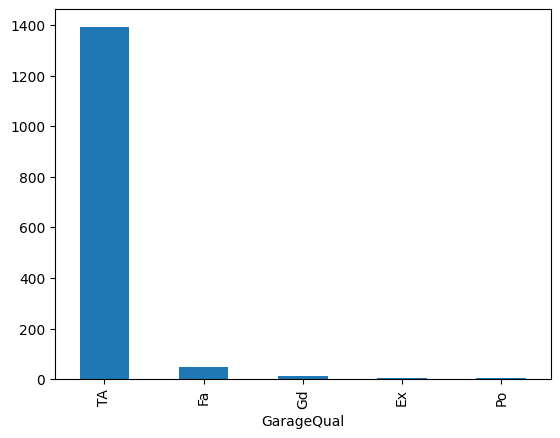

In [282]:
df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

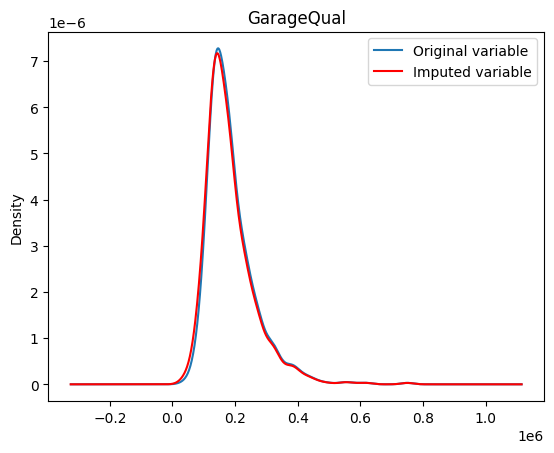

In [283]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

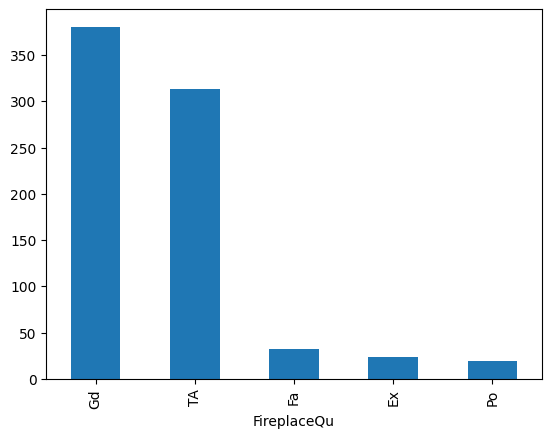

In [284]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [285]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

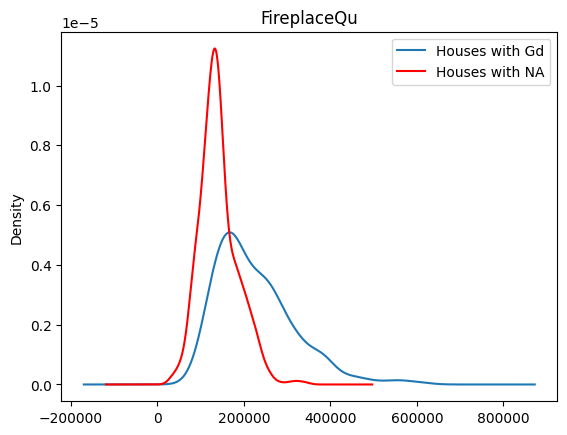

In [286]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [287]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

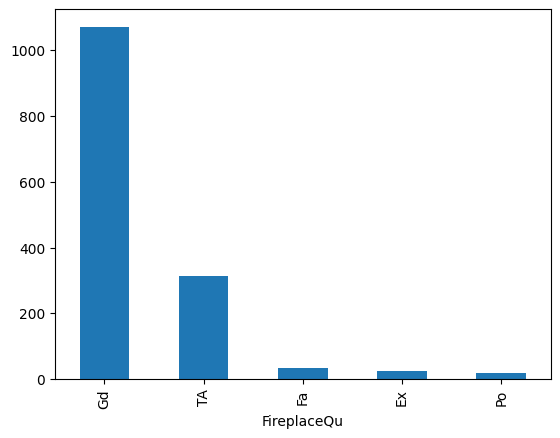

In [288]:
df['FireplaceQu'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'FireplaceQu')

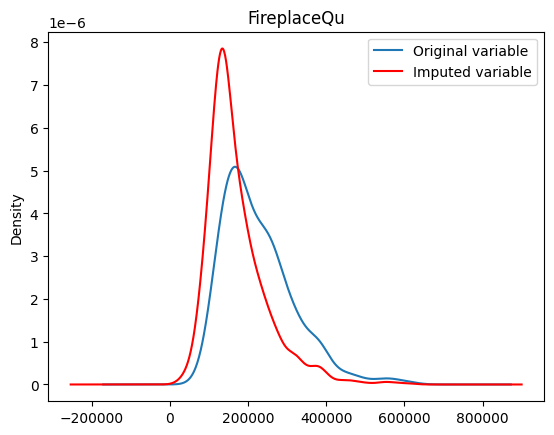

In [289]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [290]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [291]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)


In [292]:

imputer.statistics_

array([1, 20, 'RL', 60.0, 7200, 'Pave', 'Grvl', 'Reg', 'Lvl', 'AllPub',
       'Inside', 'Gtl', 'NAmes', 'Norm', 'Norm', '1Fam', '1Story', 5, 5,
       2006, 1950, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', 'BrkFace',
       0.0, 'TA', 'TA', 'PConc', 'TA', 'TA', 'No', 'GLQ', 0, 'Unf', 0, 0,
       864, 'GasA', 'Ex', 'Y', 'SBrkr', 864, 0, 0, 864, 0, 0, 2, 0, 3, 1,
       'TA', 6, 'Typ', 0, 'Gd', 'Attchd', 2005.0, 'Unf', 2, 0, 'TA', 'TA',
       'Y', 0, 0, 0, 0, 0, 0, 'Gd', 'MnPrv', 'Shed', 0, 6, 2007, 'WD',
       'Normal'], dtype=object)


Missing category imputation


In [293]:
df = pd.read_csv('/kaggle/input/train-dataset/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [294]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

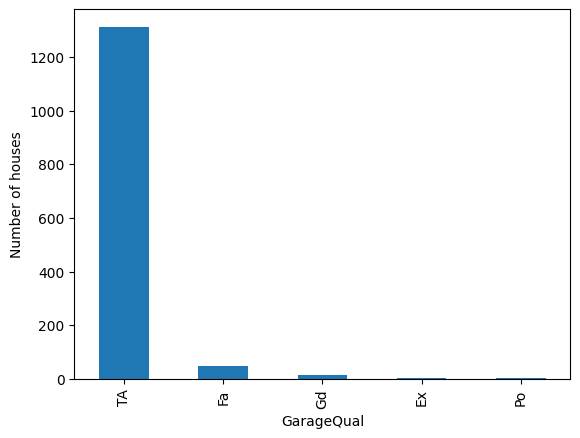

In [295]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [296]:
df['GarageQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

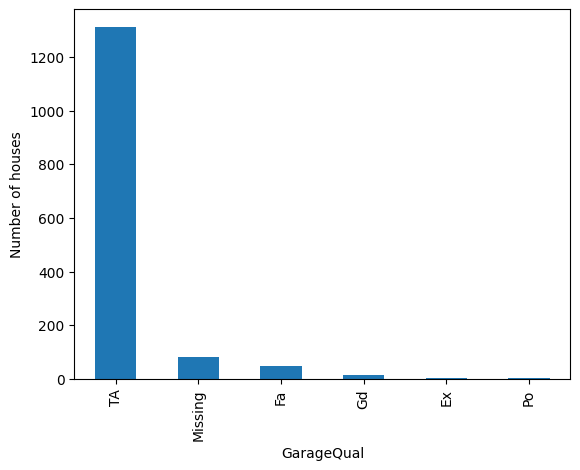

In [297]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [298]:
#via sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [299]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [300]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

Automaticaly select  imputer parameters


In [301]:
df = pd.read_csv('/kaggle/input/titanic-info/train (1).csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [302]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [303]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
30        1    male  40.0      0      0  27.7208        C
10        3  female   4.0      1      1  16.7000        S
873       3    male  47.0      0      0   9.0000        S
182       3    male   9.0      4      2  31.3875        S
876       3    male  20.0      0      0   9.8458        S

In [304]:
numerical_features = ['Age','Fare']
numerical_trf = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

categorical_features = ['Embarked','Sex']
categorical_trf = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [305]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_trf ,numerical_features),
        ('cat',categorical_trf , categorical_features)
    ]
)

In [306]:
clf= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [307]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [308]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [309]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [310]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [311]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

param_classifier__C param_preprocessor__cat__imputer__strategy  \
4                  1.0                              most_frequent   
5                  1.0                              most_frequent   
6                  1.0                                   constant   
7                  1.0                                   constant   
8                   10                              most_frequent   
9                   10                              most_frequent   
10                  10                                   constant   
11                  10                                   constant   
12                 100                              most_frequent   
13                 100                              most_frequent   
14                 100                                   constant   
15                 100                                   constant   
0                  0.1                              most_frequent   
1                  0.1                              most_frequent   
2                  0.1                                   constant   
3                  0.1                                   constant   

   param_preprocessor__num__imputer__strategy  mean_test_score  
4                                        mean         0.787852  
5                                      median         0.787852  
6                                        mean         0.787852  
7                                      median         0.787852  
8                                        mean         0.787852  
9                                      median         0.787852  
10                                       mean         0.787852  
11                                     median         0.787852  
12                                       mean         0.787852  
13                                     median         0.787852  
14                                       mean         0.787852  
15                                     median         0.787852  
0                                        mean         0.786444  
1                                      median         0.786444  
2                                        mean         0.786444  
3                                      median         0.786444

Missing INdiactor

In [312]:
df= pd.read_csv('/kaggle/input/titanic-info/train (1).csv',usecols=['Age','Fare','Survived'])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [313]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

Age     Fare
30   40.0  27.7208
10    4.0  16.7000
873  47.0   9.0000
182   9.0  31.3875
876  20.0   9.8458

In [314]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [315]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [316]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [317]:
from sklearn.impute import MissingIndicator
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [318]:
mi.features_

array([0])

In [319]:
X_train_missing = mi.transform(X_train)
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [320]:
X_test_missing = mi.transform(X_test)
X_test_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [321]:
X_train['Age_NA'] = X_train_missing
X_train.head()

Age     Fare  Age_NA
30   40.0  27.7208   False
10    4.0  16.7000   False
873  47.0   9.0000   False
182   9.0  31.3875   False
876  20.0   9.8458   False

In [322]:
X_test['Age_NA'] = X_test_missing

In [323]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [324]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [325]:
si = SimpleImputer(add_indicator=True)  #this add_indicator automaically makes missing value indicator column

In [326]:
X_train = si.fit_transform(X_train)

In [327]:
X_test = si.transform(X_test)

In [328]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

random-sample-imputer

In [329]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [330]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [331]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

Age      Fare
30   40.0   27.7208
10    4.0   16.7000
873  47.0    9.0000
182   9.0   31.3875
876  20.0    9.8458
..    ...       ...
534  30.0    8.6625
584   NaN    8.7125
493  71.0   49.5042
527   NaN  221.7792
168   NaN   25.9250

[712 rows x 2 columns]

In [332]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

X_test.tail()

Age     Fare  Age_imputed
89   24.0   8.0500         24.0
80   22.0   9.0000         22.0
846   NaN  69.5500          NaN
870  26.0   7.8958         26.0
251  29.0  10.4625         29.0

In [333]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values #'''this return number of missing values in age , basically how many calues to impute'''
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [334]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([23.  , 21.  , 24.  , 31.  , 24.  ,  4.  , 29.  , 34.  , 31.  ,
       24.  ,  0.75, 58.  , 19.  , 19.  ,  9.  , 42.  , 45.  , 37.  ,
       58.  , 39.  , 49.  , 27.  , 21.  , 28.  , 16.  , 18.  , 16.  ,
        4.  , 31.  , 30.  , 70.5 , 17.  , 61.  , 18.  , 27.  , 52.  ,
       48.  , 33.  , 23.  , 23.  , 30.  ,  7.  , 45.  , 36.  , 30.  ,
       28.  , 19.  , 27.  , 25.  , 40.5 , 18.  ,  4.  , 19.  , 61.  ,
       22.  , 22.  , 43.  , 31.  , 17.  , 23.  , 36.  , 30.  ,  2.  ,
       28.  , 37.  , 19.  , 31.  , 42.  , 26.  , 43.  , 14.  ,  6.  ,
       21.  , 41.  , 48.  , 32.  , 25.  , 38.  , 36.  , 20.  , 16.  ,
       26.  , 29.  , 26.  , 38.  , 28.  , 32.  ,  4.  , 38.  , 47.  ,
       16.  , 25.  , 33.  ,  7.  , 30.  , 22.  , 18.  , 21.  , 40.  ,
       18.  , 51.  ,  3.  , 47.  , 35.  , 33.  , 25.  , 28.  , 46.  ,
       40.5 , 57.  , 24.  , 20.  , 22.  , 71.  , 29.  , 22.  , 22.  ,
       33.  , 23.  , 61.  , 16.  , 28.5 , 42.  , 17.  , 18.  , 45.  ,
       19.  , 43.  ,

In [335]:
X_train['Age'].isnull().sum()

148

In [336]:
X_train.sample(7)

Age     Fare  Age_imputed
466   NaN   0.0000         18.0
548  33.0  20.5250         33.0
302  19.0   0.0000         19.0
418  30.0  13.0000         30.0
450  36.0  27.7500         36.0
282  16.0   9.5000         16.0
44   19.0   7.8792         19.0

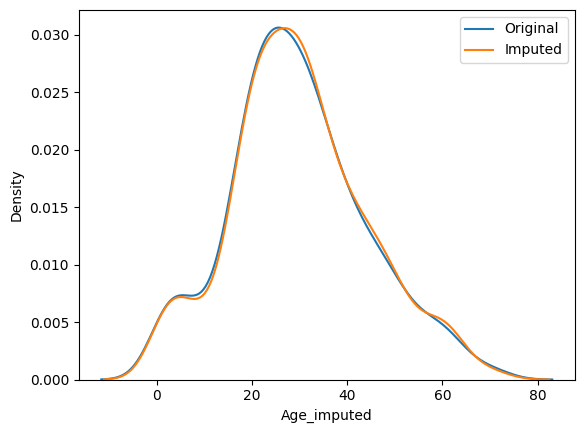

In [337]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [338]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.67243083724443


In [339]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()


Fare         Age  Age_imputed
Fare         2368.246832   71.512440    55.184492
Age            71.512440  204.349513   204.349513
Age_imputed    55.184492  204.349513   203.672431

<Axes: >

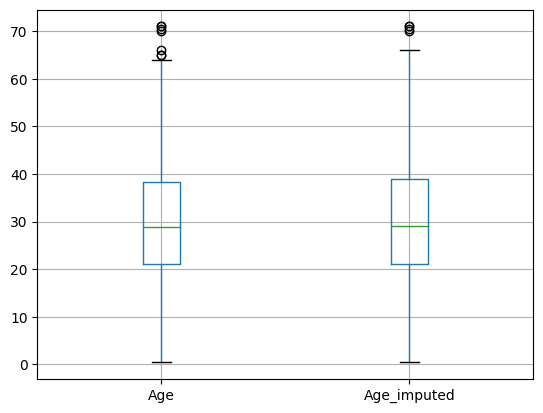

In [340]:
X_train[['Age', 'Age_imputed']].boxplot()

In [341]:
data = pd.read_csv("/kaggle/input/house-train/house-train.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [342]:
data.head()

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000

In [343]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [344]:
X = data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [345]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [346]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [347]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [348]:
temp

original   imputed
TA  0.951043  0.947774
Fa  0.037171  0.040240
Gd  0.009973  0.010274
Po  0.000907  0.000856
Ex  0.000907  0.000856

In [349]:

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

original   imputed
Gd  0.494272  0.646465
TA  0.412439  0.542088
Fa  0.040917  0.052750
Po  0.027823  0.037037
Ex  0.024550  0.032548

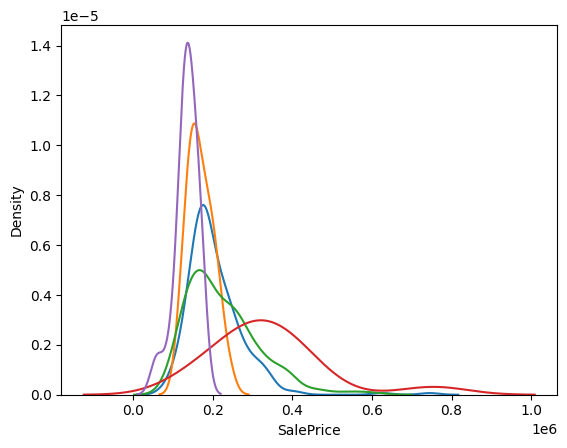

In [350]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

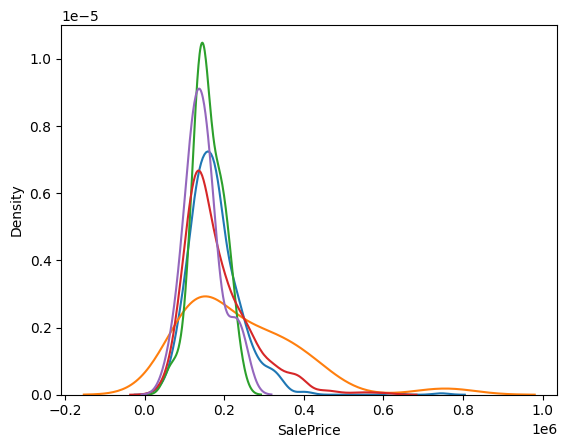

In [351]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

KNN IMputer

In [352]:
df= pd.read_csv('/kaggle/input/titanic-info/train (1).csv')[['Age','Pclass','Fare','Survived']]

In [353]:
df.head()

Age  Pclass     Fare  Survived
0  22.0       3   7.2500         0
1  38.0       1  71.2833         1
2  26.0       3   7.9250         1
3  35.0       1  53.1000         1
4  35.0       3   8.0500         0

In [354]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [355]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

Age  Pclass     Fare
30   40.0       1  27.7208
10    4.0       3  16.7000
873  47.0       3   9.0000
182   9.0       3  31.3875
876  20.0       3   9.8458

In [356]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [357]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [358]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

iterative imputer

In [359]:
df=pd.read_csv('/kaggle/input/fifty-startups/50_Startups.csv')
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [360]:
df = np.round(df[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
df.head()

R&D Spend  Administration  Marketing Spend  Profit
0       17.0            14.0             47.0    19.0
1       16.0            15.0             44.0    19.0
2       15.0            10.0             41.0    19.0
3       14.0            12.0             38.0    18.0
4       14.0             9.0             37.0    17.0

In [361]:
df = df.iloc[:,0:-1] #all rows , col from 0 to last col(-1 means 1st from backwards,but exclude it coz the right most in _:_ is not included)
df.head()

R&D Spend  Administration  Marketing Spend
0       17.0            14.0             47.0
1       16.0            15.0             44.0
2       15.0            10.0             41.0
3       14.0            12.0             38.0
4       14.0             9.0             37.0

In [362]:
np.random.seed(9)
df=df.sample(5)
df

R&D Spend  Administration  Marketing Spend
21        8.0            15.0             30.0
37        4.0             5.0             20.0
2        15.0            10.0             41.0
14       12.0            16.0             26.0
44        2.0            15.0              3.0

In [363]:

df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN

In [364]:
df.head()

R&D Spend  Administration  Marketing Spend
21        8.0            15.0             30.0
37        NaN             5.0             20.0
2        15.0            10.0             41.0
14       12.0             NaN             26.0
44        2.0            15.0              NaN

In [365]:
# Step 1 - Impute all missing values with mean of respective col

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [366]:
# 0th Iteration
df0

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37       9.25            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.25            26.00
44       2.00           15.00            29.25

In [367]:
# Remove the col1 imputed value
df1 = df0.copy()

df1.iloc[1,0] = np.NaN

df1

R&D Spend  Administration  Marketing Spend
21        8.0           15.00            30.00
37        NaN            5.00            20.00
2        15.0           10.00            41.00
14       12.0           11.25            26.00
44        2.0           15.00            29.25

In [368]:
# Use complete cols to build a model(X) and use the NAN one for prediction(Y)

X = df1.iloc[[0,2,3,4],1:3]
X

Administration  Marketing Spend
21           15.00            30.00
2            10.00            41.00
14           11.25            26.00
44           15.00            29.25

In [369]:
y = df1.iloc[[0,2,3,4],0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [370]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

array([23.14158651])

In [371]:
df1.iloc[1,0] = 23.14
df1

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37      23.14            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.25            26.00
44       2.00           15.00            29.25

In [372]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

R&D Spend  Administration  Marketing Spend
21       8.00            15.0            30.00
37      23.14             5.0            20.00
2       15.00            10.0            41.00
14      12.00             NaN            26.00
44       2.00            15.0            29.25

In [373]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

R&D Spend  Marketing Spend
21       8.00            30.00
37      23.14            20.00
2       15.00            41.00
44       2.00            29.25

In [374]:
y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [375]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

array([11.06331285])

In [376]:
df1.iloc[3,1] = 11.06
df1

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37      23.14            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.06            26.00
44       2.00           15.00            29.25

In [377]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

R&D Spend  Administration  Marketing Spend
21       8.00           15.00             30.0
37      23.14            5.00             20.0
2       15.00           10.00             41.0
14      12.00           11.06             26.0
44       2.00           15.00              NaN

In [378]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

R&D Spend  Administration
21       8.00           15.00
37      23.14            5.00
2       15.00           10.00
14      12.00           11.06

In [379]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [380]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

array([31.56351448])

In [381]:
df1.iloc[4,-1] = 31.56
df1

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37      23.14            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.06            26.00
44       2.00           15.00            31.56

In [382]:
# Subtract 0th iteration from 1st iteration

df1 - df0

R&D Spend  Administration  Marketing Spend
21       0.00            0.00             0.00
37      13.89            0.00             0.00
2        0.00            0.00             0.00
14       0.00           -0.19             0.00
44       0.00            0.00             2.31

In [383]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

R&D Spend  Administration  Marketing Spend
21        8.0           15.00            30.00
37        NaN            5.00            20.00
2        15.0           10.00            41.00
14       12.0           11.06            26.00
44        2.0           15.00            31.56

In [384]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

array([23.78627207])

In [385]:
df2.iloc[1,0] = 23.78
df2

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37      23.78            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.06            26.00
44       2.00           15.00            31.56

In [386]:
df2.iloc[3,1] = np.NaN
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

array([11.22020174])

In [387]:
df2.iloc[3,1] = 11.22

In [388]:
df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

array([38.87979054])

In [389]:
df2.iloc[4,-1] = 38.87
df2

R&D Spend  Administration  Marketing Spend
21       8.00           15.00            30.00
37      23.78            5.00            20.00
2       15.00           10.00            41.00
14      12.00           11.22            26.00
44       2.00           15.00            38.87

In [390]:
df2 - df1

R&D Spend  Administration  Marketing Spend
21       0.00            0.00             0.00
37       0.64            0.00             0.00
2        0.00            0.00             0.00
14       0.00            0.16             0.00
44       0.00            0.00             7.31

In [391]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

R&D Spend  Administration  Marketing Spend
21        8.0           15.00            30.00
37        NaN            5.00            20.00
2        15.0           10.00            41.00
14       12.0           11.22            26.00
44        2.0           15.00            38.87

In [392]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

array([26.82082209])

In [393]:
df3.iloc[1,0] = 26.82

In [394]:
df3.iloc[3,1] = np.NaN
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

array([12.22106654])

In [395]:
df3.iloc[3,1] = 12.22

In [396]:
df3.iloc[4,-1] = np.NaN

X = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

array([62.65086843])

In [397]:
df3.iloc[4,-1] = 62.65

In [398]:
df3-df2 # And like that the stopping criteria is that the difference of the values becomes near zero

R&D Spend  Administration  Marketing Spend
21       0.00             0.0             0.00
37       3.04             0.0             0.00
2        0.00             0.0             0.00
14       0.00             1.0             0.00
44       0.00             0.0            23.78

**Outliers**

Removing using z-score

In [400]:
df = pd.read_csv("/kaggle/input/placement/placement.csv")
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

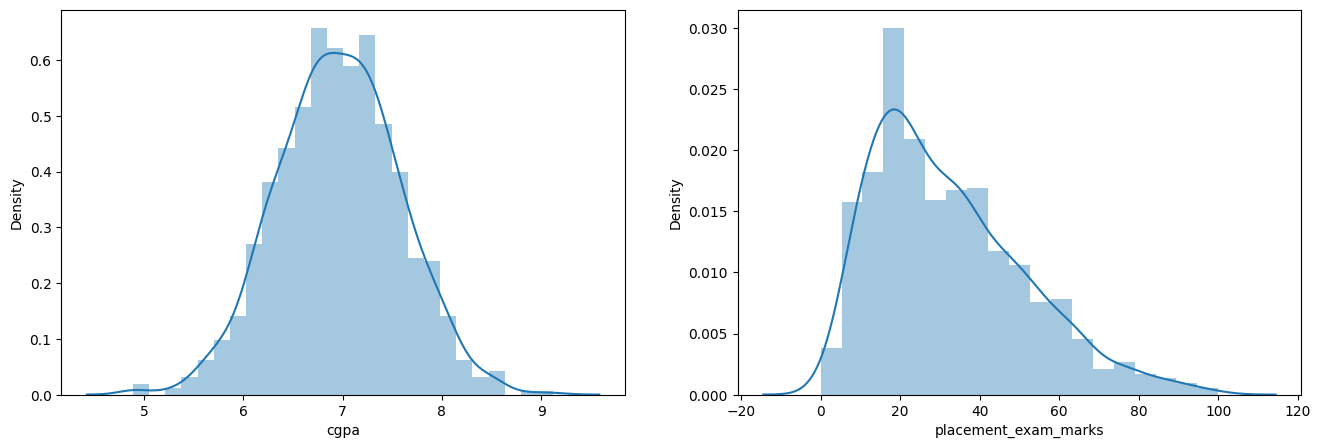

In [402]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [403]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [405]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [406]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std()) #MU +- 3* sigma
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [407]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

In [408]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

In [409]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

cgpa  placement_exam_marks  placed  cgpa_zscore
0  7.19                  26.0       1     0.371425
1  7.46                  38.0       1     0.809810
2  7.54                  40.0       1     0.939701
3  6.42                   8.0       1    -0.878782
4  7.23                  17.0       0     0.436371

In [410]:
df[df['cgpa_zscore'] > 3]

cgpa  placement_exam_marks  placed  cgpa_zscore
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062

In [411]:
df[df['cgpa_zscore'] < -3]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

In [412]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

In [413]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.19                  26.0       1     0.371425
1    7.46                  38.0       1     0.809810
2    7.54                  40.0       1     0.939701
3    6.42                   8.0       1    -0.878782
4    7.23                  17.0       0     0.436371
..    ...                   ...     ...          ...
991  7.04                  57.0       0     0.127878
992  6.26                  12.0       0    -1.138565
993  6.73                  21.0       1    -0.375452
994  6.48                  63.0       0    -0.781363
998  8.62                  46.0       1     2.693239

[995 rows x 4 columns]

capping

In [416]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
upper_limit , lower_limit

(8.808933625397168, 5.113546374602832)

In [417]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [419]:
df.shape

(1000, 4)

In [420]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

outlier removal using IQR method

In [421]:
df = pd.read_csv("/kaggle/input/placement/placement.csv")
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

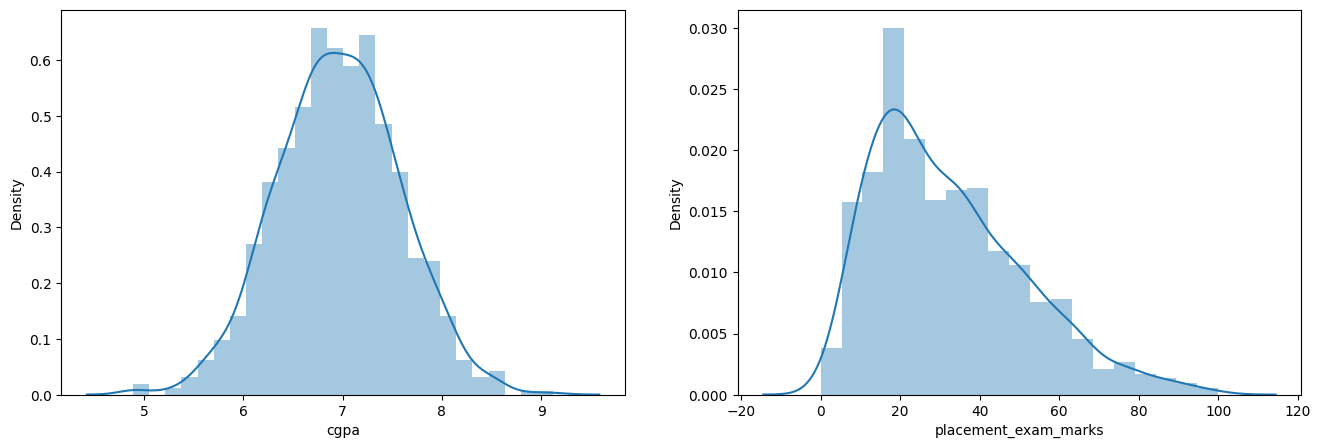

In [422]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [423]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

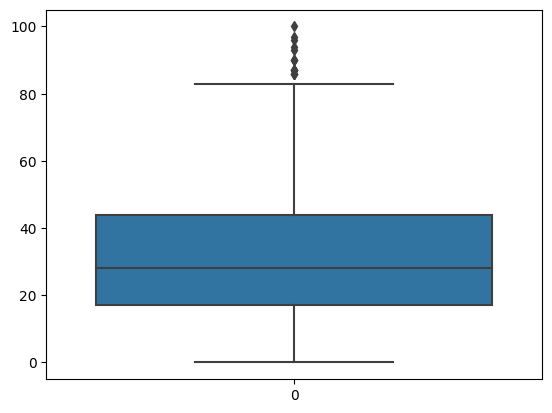

In [424]:
sns.boxplot(df['placement_exam_marks'])

In [426]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25,percentile75

(17.0, 44.0)

In [427]:
iqr = percentile75 - percentile25
iqr

27.0

In [429]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limit , lower_limit

(84.5, -23.5)

In [435]:
df[df['placement_exam_marks'] > upper_limit]

cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0

In [436]:
df[df['placement_exam_marks'] < lower_limit]

Empty DataFrame
Columns: [cgpa, placement_exam_marks, placed]
Index: []

In [437]:
#trimming
new_df = df[df['placement_exam_marks'] < upper_limit]

In [438]:
new_df.shape

(985, 3)

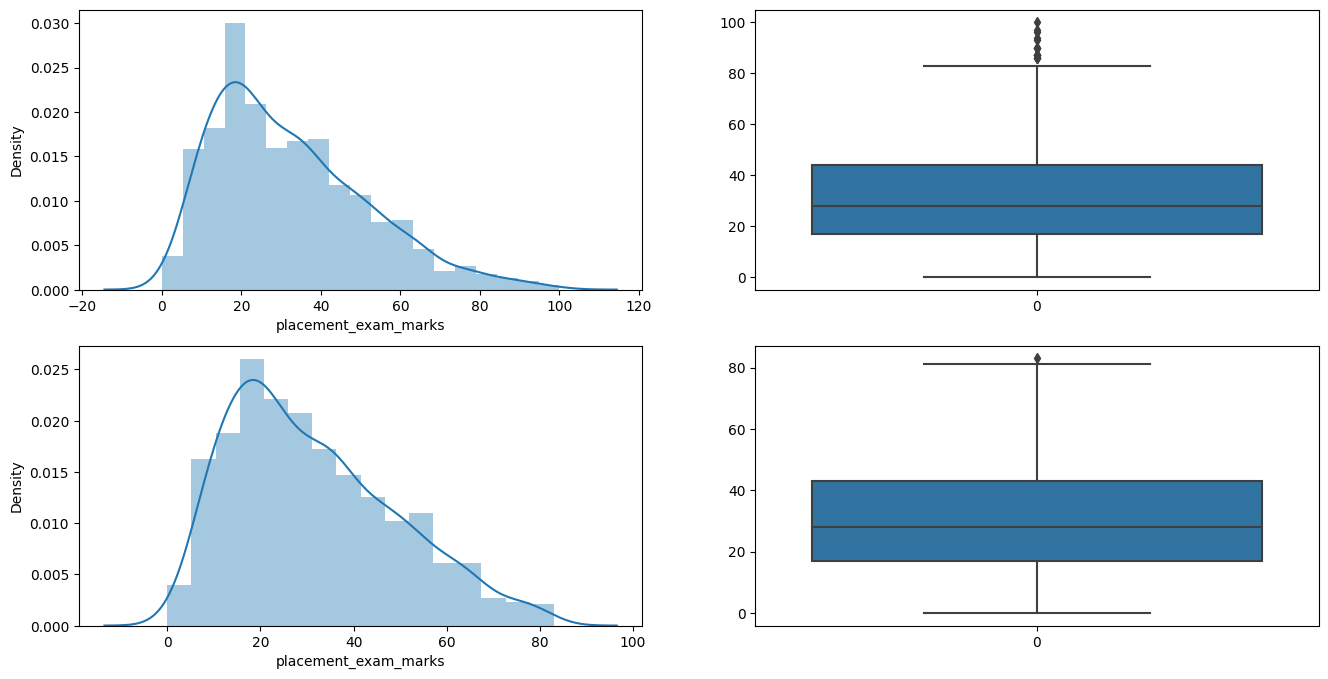

In [439]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [440]:
#capping
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [441]:
new_df_cap.shape

(1000, 3)

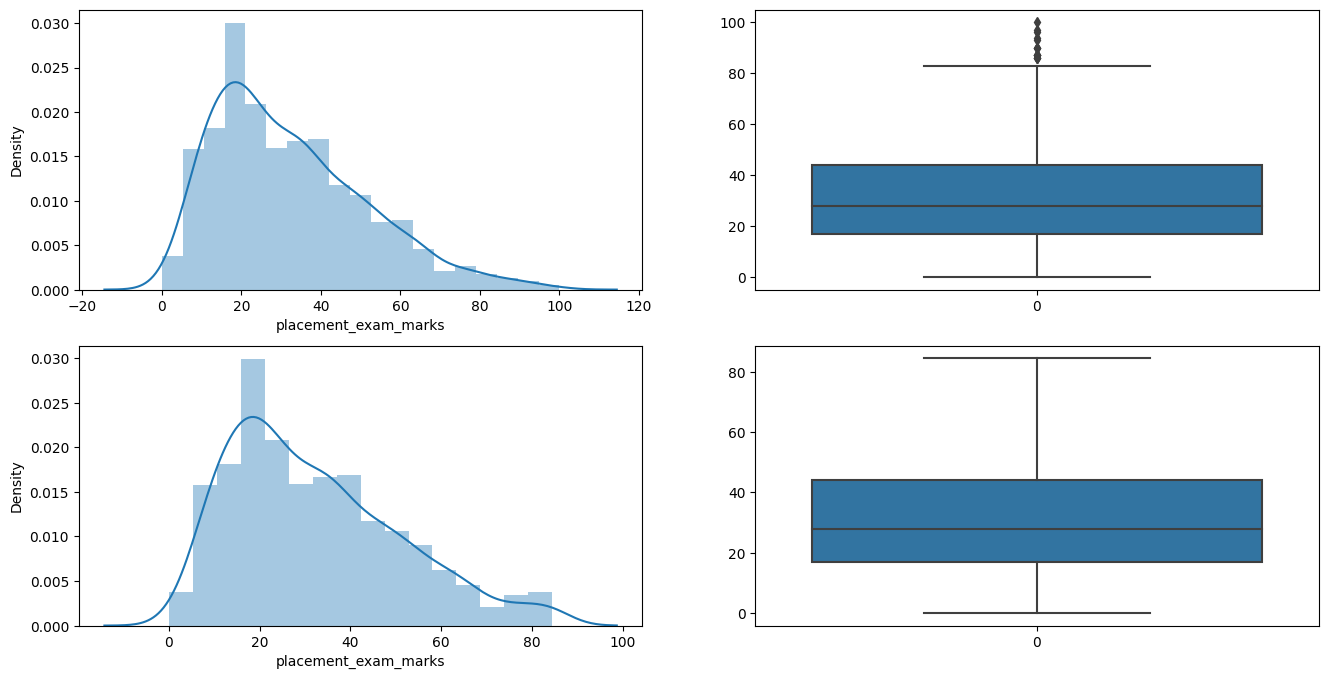

In [442]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

outlier detection using percentiles

In [443]:
df = pd.read_csv("/kaggle/input/weight-height/weight-height.csv")
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [444]:
df.shape

(10000, 3)

In [445]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

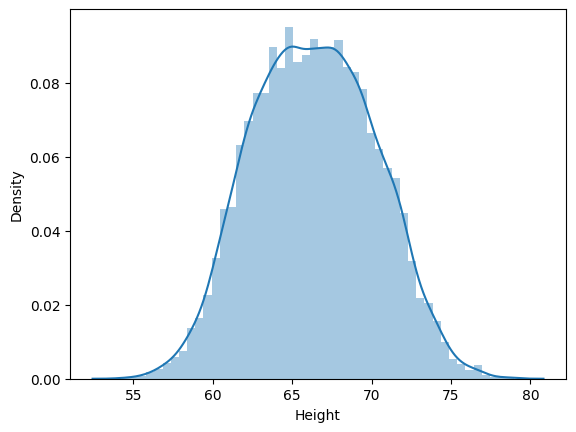

In [446]:
sns.distplot(df['Height'])

<Axes: >

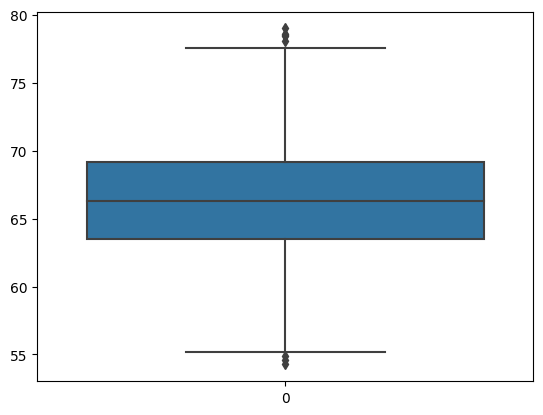

In [447]:
sns.boxplot(df['Height'])

In [448]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [449]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [450]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [451]:
new_df['Height'].describe()


count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [452]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

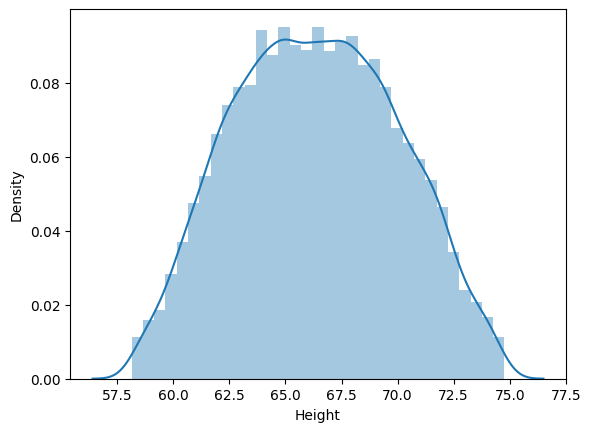

In [453]:
sns.distplot(new_df['Height'])

<Axes: >

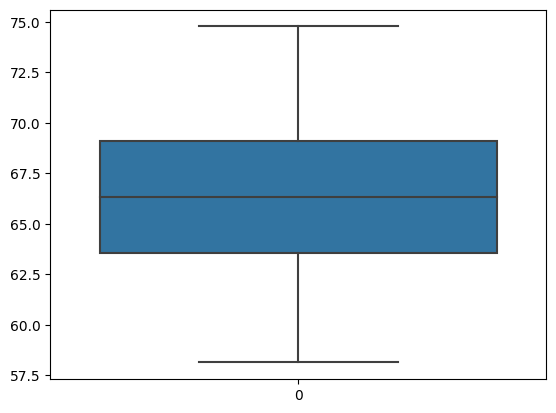

In [454]:

sns.boxplot(new_df['Height'])

In [455]:

# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [456]:

df.shape

(10000, 3)

In [457]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

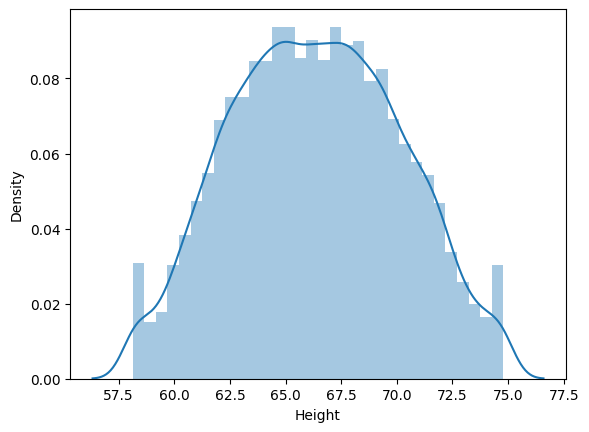

In [458]:
sns.distplot(df['Height'])

<Axes: >

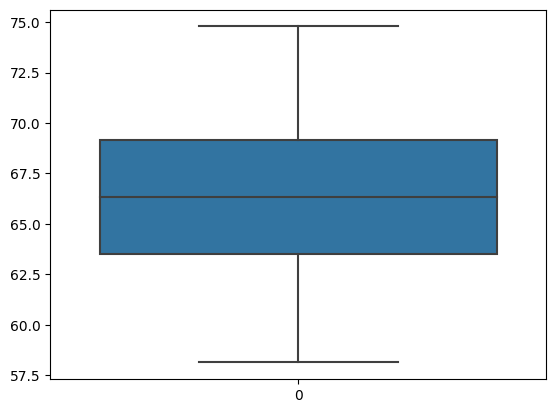

In [459]:
sns.boxplot(df['Height'])

**Feature Construction and Feature Splitting**

In [460]:
df = pd.read_csv('/kaggle/input/titanic-info/train (1).csv')[['Age','Pclass','SibSp','Parch','Survived']]
df.head()

Age  Pclass  SibSp  Parch  Survived
0  22.0       3      1      0         0
1  38.0       1      1      0         1
2  26.0       3      0      0         1
3  35.0       1      1      0         1
4  35.0       3      0      0         0

In [461]:
df.dropna(inplace=True)
df.head()

Age  Pclass  SibSp  Parch  Survived
0  22.0       3      1      0         0
1  38.0       1      1      0         1
2  26.0       3      0      0         1
3  35.0       1      1      0         1
4  35.0       3      0      0         0

In [464]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]
X.head()

Age  Pclass  SibSp  Parch
0  22.0       3      1      0
1  38.0       1      1      0
2  26.0       3      0      0
3  35.0       1      1      0
4  35.0       3      0      0

In [465]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.6933333333333332

In [467]:
#after feature contruction 
X['Family_size'] = X['SibSp'] + X['Parch'] + 1
X.head()

Age  Pclass  SibSp  Parch  Family_size
0  22.0       3      1      0            2
1  38.0       1      1      0            2
2  26.0       3      0      0            1
3  35.0       1      1      0            2
4  35.0       3      0      0            1

In [468]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [469]:
myfunc(4)

1

In [471]:
X['Family_type'] = X['Family_size'].apply(myfunc)
X.head()

Age  Pclass  SibSp  Parch  Family_size  Family_type
0  22.0       3      1      0            2            1
1  38.0       1      1      0            2            1
2  26.0       3      0      0            1            0
3  35.0       1      1      0            2            1
4  35.0       3      0      0            1            0

In [472]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [473]:
X.head()

Age  Pclass  Family_type
0  22.0       3            1
1  38.0       1            1
2  26.0       3            0
3  35.0       1            1
4  35.0       3            0

In [474]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))

0.7003174603174602

In [475]:
#Feature Splitting 
df = pd.read_csv('/kaggle/input/titanic-info/train (1).csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [476]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [477]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [478]:
df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [479]:
df[['Title','Name']]

Title                                               Name
0      Mr                            Braund, Mr. Owen Harris
1     Mrs  Cumings, Mrs. John Bradley (Florence Briggs Th...
2    Miss                             Heikkinen, Miss. Laina
3     Mrs       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4      Mr                           Allen, Mr. William Henry
..    ...                                                ...
886   Rev                              Montvila, Rev. Juozas
887  Miss                       Graham, Miss. Margaret Edith
888  Miss           Johnston, Miss. Catherine Helen "Carrie"
889    Mr                              Behr, Mr. Karl Howell
890    Mr                                Dooley, Mr. Patrick

[891 rows x 2 columns]

In [484]:
df.groupby('Title')['Survived'].mean().sort_values(ascending=False)


Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

In [485]:
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

In [488]:
df['Is_Married']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Is_Married, Length: 891, dtype: int64

In [489]:
df.sample(7)

PassengerId  Survived  Pclass  \
708          709         1       1   
120          121         0       2   
475          476         0       1   
462          463         0       1   
869          870         1       3   
518          519         1       2   
238          239         0       2   

                                                  Name     Sex   Age  SibSp  \
708                               Cleaver, Miss. Alice  female  22.0      0   
120                        Hickman, Mr. Stanley George    male  21.0      2   
475                        Clifford, Mr. George Quincy    male   NaN      0   
462                                  Gee, Mr. Arthur H    male  47.0      0   
869                    Johnson, Master. Harold Theodor    male   4.0      1   
518  Angle, Mrs. William A (Florence "Mary" Agnes H...  female  36.0      1   
238                    Pengelly, Mr. Frederick William    male  19.0      0   

     Parch        Ticket      Fare Cabin Embarked   Title  Is_Married  
708      0        113781  151.5500   NaN        S    Miss           0  
120      0  S.O.C. 14879   73.5000   NaN        S      Mr           0  
475      0        110465   52.0000   A14        S      Mr           0  
462      0        111320   38.5000   E63        S      Mr           0  
869      1        347742   11.1333   NaN        S  Master           0  
518      0        226875   26.0000   NaN        S     Mrs           1  
238      0         28665   10.5000   NaN        S      Mr           0